In [1]:
#Import Libraries Here

#Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import csv
from io import StringIO

# Load Data

In [2]:
data = pd.read_csv("Energy_Consumption_of_AI.csv")

In [3]:
df=data.copy()

# Clean Data

In [4]:
df['IPAddress'].nunique()

51

In [5]:
# Check for duplice data based on the vehical ID and the start time stamp
# Group by 'Local Trip Start Time' and count unique 'Vehicle ID' entries
unique_IP_Address = df.groupby('EndDate')['IPAddress'].nunique()

# Check if any 'Local Trip Start Time' has more than one unique 'Vehicle ID'
id = unique_IP_Address [unique_IP_Address  > 1]

if id.empty:
    print("Data only one IP Address.")
else:
    print("Data has more than one IP Address:")
    print(id)

Data has more than one IP Address:
EndDate
2/4/2025 19:22    2
Name: IPAddress, dtype: int64


In [6]:
df = df.sort_index(ascending=False).drop_duplicates(subset=['IPAddress'], keep='first')

In [7]:
dropped_objects_df=df.drop(["StartDate","EndDate","Status",	"Progress",	"Duration (in seconds)","Finished",	"RecordedDate","ResponseId","LocationLatitude",	"LocationLongitude","DistributionChannel","UserLanguage"],axis=1)
#dropped_objects_df=dropped_objects_df["IPAddress"].dropna
#dropped_objects_df= dropped_objects_df.astype(str)  # Ensure it's string
dropped_objects_df.head()

IPAddress Q1_Education_Level  Q2_Gender            Q3_Generation  \
64             NaN                 NaN       NaN                      NaN   
51  172.226.175.42    Bachelors Degree    Female        Gen X (1965-1980)   
50  129.208.94.228           Doctorate      Male  Millennial  (1981-1996)   
49     99.1.175.25    Bachelors Degree    Female        Gen X (1965-1980)   
48  67.182.149.210    Bachelors Degree    Female       Gen Z  (1997-2012)   

           Q4_Survey_Link_From Q5_Familiarity_With_AI  \
64                         NaN                    NaN   
51  Direct Message / Colleague           Not Familiar   
50                    Facebook     Extremely Familiar   
49                    LinkedIn          Very Familiar   
48                    LinkedIn     Extremely Familiar   

   Q6_Familiarity_With_Renewable_Energy_Initiatives  \
64                                              NaN   
51                                               No   
50                                              Yes   
49                                               No   
48                                              Yes   

                Q7_Use_of_generative_AI  \
64                                  NaN   
51                       Work,Education   
50                                 Work   
49                       Work,Education   
48  Work,Entertainment,Content Creation   

                          Q8_Program_Enrolled  Q9_Field_Of_Work  ...  \
64                                         NaN              NaN  ...   
51                                        LCDC              NaN  ...   
50                                         NaN       Professor   ...   
49                     Healthcare Informatics               NaN  ...   
48  Master of Science, Information Management               NaN  ...   

   Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency  \
64                                                NaN      
51                               Moderately Efficient      
50                               Moderately Efficient      
49                                 Somewhat Efficient      
48                                 Somewhat Efficient      

   Q14_Is_Environmental_Impact_Concerning  \
64                                    NaN   
51                       Moderately agree   
50                        Extremely agree   
49                         Slightly agree   
48                       Moderately agree   

   Q15_Importants_Of_AI_Performance_For_Energy-Efficient_Practices  \
64                                                NaN                
51                                     Very important                
50                               Moderately important                
49                                     Very important                
48                               Moderately important                

   Q16_Environmental_Concerns Q17_AI_Estimate_Of_Energy_Used   \
64                        NaN                             NaN   
51        Extremely concerned                             Yes   
50        Extremely concerned                             Yes   
49             Very concerned                             Yes   
48             Very concerned                             Yes   

   Q18_Limiting_Use_Of_AI_For_Environmental Q19_AI_Accessed_Fee  \
64                                      NaN                 NaN   
51                                      Yes                 Yes   
50                                      Yes                 Yes   
49                                   Unsure                  No   
48                                   Unsure                 Yes   

   Q20_AI_Companies_Energy_Consumption_Regulations  \
64                                             NaN   
51                                             Yes   
50                                             Yes   
49                                             Yes   
48                                             Yes   

   Q21_C

In [8]:
dropped_objects_df.columns =dropped_objects_df.columns.str.strip()

In [9]:
# Replace 'NaN' strings with actual NaN values
dropped_objects_df = dropped_objects_df.replace('NaN', np.nan) # convert string NaN to nan
dropped_objects_df = dropped_objects_df.dropna(how='all') #  Removing Rows with All NaN Values
dropped_objects_df = dropped_objects_df.dropna(axis=1,how='all') #Removing Columns with all NaN Values

In [10]:
data_=dropped_objects_df.copy()

 # Convert to Numrical

In [11]:
unique_values_list = dropped_objects_df['Q1_Education_Level'].unique().tolist()
print(unique_values_list)

['Bachelors Degree', 'Doctorate', 'Masters Degree', 'Other', 'High School']


In [12]:
def convert_education(education):
    #if isinstance(education, str):  # Ensure it's a string before checking
        if education == 'Other':
            return 1
        elif education == 'High School':
            return 2
        elif education == 'Bachelors Degree':
            return 3
        elif education == 'Masters Degree':
            return 4
        elif education == 'Doctorate':
            return 5
        else:
            return 0  # Default value for NaN or unrecognized values

dropped_objects_df['Education_Level']=dropped_objects_df['Q1_Education_Level'].apply(convert_education) # apply funstion to data frame 

In [13]:
def convert_gender(sex):  #define a funtion to convert back to categorize data
   # if isinstance(sex, str):  # Ensure it's a string before checking
        if sex in 'Male':
            return 1
        elif sex in 'Female':
            return 2
        else:
            return 0

dropped_objects_df['Gender']=dropped_objects_df['Q2_Gender'].apply(convert_gender) # apply funstion to data frame 

In [14]:
def convert_generation(generation):  #define a funtion to convert back to categorize data
    #if isinstance(generation, str):  # Ensure it's a string before checking
        if generation in 'Gen Z  (1997-2012)':
            return 1
        elif generation in 'Millennial  (1981-1996)':
            return 2
        elif generation in 'Gen X (1965-1980)':
            return 3
        elif generation in 'Gen Boomer (1946-1964)':
            return 4
        else:
            return 0

dropped_objects_df['Generation']=dropped_objects_df['Q3_Generation'].apply(convert_generation) # apply funstion to data frame 

In [15]:
def convert_Familiarity_With_AI(generation):  #define a funtion to convert back to categorize data
    if isinstance(generation, str):  # Ensure it's a string before checking
        if generation in 'Not Familiar':
            return 1
        elif generation in 'Somewhat Familiar':
            return 2
        elif generation in 'Moderately Familiar':
            return 3
        elif generation in 'Very Familiar':
            return 4
        elif generation in 'Extremely Familiar':
            return 5
        else:
            return 0

dropped_objects_df['Familiarity_With_AI']=dropped_objects_df['Q5_Familiarity_With_AI'].apply(convert_Familiarity_With_AI) # apply funstion to data frame 

In [16]:
def convert_renewable_energy(renewable):  #define a funtion to convert back to categorize data
    #if isinstance(renewable, str):  # Ensure it's a string before checking
        if renewable in 'No':
            return 1
        elif renewable in 'Yes':
            return 2
        else:
            return 0

dropped_objects_df['Familiarity_With_Renewable_Energy_Initiatives']=dropped_objects_df['Q6_Familiarity_With_Renewable_Energy_Initiatives'].apply(convert_renewable_energy) # apply funstion to data frame 

In [17]:
def convert_time(time):  #define a funtion to convert back to categorize data
   # if isinstance(time, str):  # Ensure it's a string before checking
        if time in '1 - 2 Hours':
            return 1
        elif time in '1 - 30 Minutes':
            return 2
        elif time in 'More than 2 hours':
            return 3
        else:
            return 0

dropped_objects_df['Time_Using_AI']=dropped_objects_df['Q10_Time_Using_AI'].apply(convert_time) # apply funstion to data frame 


In [18]:
def convert_AI_Use_Over_Traditional_Methods(methods):  #define a funtion to convert back to categorize data
    #if isinstance(methods, str):  # Ensure it's a string before checking
        if methods in 'No':
            return 1
        elif methods in 'Yes':
            return 2
        else:
            return 0

dropped_objects_df['AI_Use_Over_Traditional_Methods']=dropped_objects_df['Q11_AI_Use_Over_Traditional_Methods'].apply(convert_AI_Use_Over_Traditional_Methods) # apply funstion to data frame 

In [19]:
def convert_Environmental_Impact(impact):  #define a funtion to convert back to categorize data
   # if isinstance(impact, str):  # Ensure it's a string before checking
        if impact in 'Not Aware':
            return 1
        elif impact in 'Somewhat Aware':
            return 2
        elif impact in 'Moderately Aware':
            return 3
        elif impact in 'Very Aware':
            return 4
        elif impact in 'Extremely Aware':
            return 5
        else:
            return 0

dropped_objects_df['AI_Awareness_Of_Environmental_Impact']=dropped_objects_df['Q12_AI_Awareness_Of_Environmental_Impact'].apply(convert_Environmental_Impact) # apply funstion to data frame 

In [20]:
def convert_traditional(energy):  #define a funtion to convert back to categorize data
    #if isinstance(energy, str):  # Ensure it's a string before checking
        if  energy in 'Much more Efficient':
            return 1
        elif energy in 'Moderately Efficient':
            return 2
        elif energy in 'Somewhat Efficient':
            return 3
        elif energy in 'Much less Efficient':
            return 4
        else:
            return 0

dropped_objects_df['AI_Use_Over_Traditional_Methods_Energy_Efficiency']=dropped_objects_df['Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency'].apply(convert_traditional) # apply funstion to data frame 

In [21]:
def convert_traditional(energy):  #define a funtion to convert back to categorize data
    #if isinstance(energy, str):  # Ensure it's a string before checking
        if  energy in 'Neither agree nor disagree':
            return 1
        elif energy in 'Slightly agree':
            return 2
        elif energy in 'Moderately agree':
            return 3
        elif energy in 'Extremely agree':
            return 4
        else:
            return 0

dropped_objects_df['Is_Environmental_Impact_Concerning']=dropped_objects_df['Q14_Is_Environmental_Impact_Concerning'].apply(convert_traditional) # apply funstion to data frame 

In [22]:
def convert_traditional(energy):  #define a funtion to convert back to categorize data
    #if isinstance(energy, str):  # Ensure it's a string before checking
        if  energy in 'Not important':
            return 1
        elif energy in 'Somewhat important':
            return 2
        elif energy in 'Moderately important':
            return 3
        elif energy in 'Very important':
            return 4
        elif energy in 'Extremely important':
            return 4
        else:
            return 0

dropped_objects_df['Importants_Of_AI_Performance_For_Energy-Efficient_Practices']=dropped_objects_df['Q15_Importants_Of_AI_Performance_For_Energy-Efficient_Practices'].apply(convert_traditional) # apply funstion to data frame 

In [23]:
def convert_traditional(energy):  #define a funtion to convert back to categorize data
    #if isinstance(energy, str):  # Ensure it's a string before checking
        if  energy in 'Not concerned':
            return 1
        elif energy in 'Somewhat concerned':
            return 2
        elif energy in 'Moderately concerned':
            return 3
        elif energy in 'Very concerned':
            return 4
        elif energy in 'Extremely concerned':
            return 4
        else:
            return 0

dropped_objects_df['Environmental_Concerns']=dropped_objects_df['Q16_Environmental_Concerns'].apply(convert_traditional) # apply funstion to data frame 

In [24]:
def convert_AI_Use_Over_Traditional_Methods(methods):  #define a funtion to convert back to categorize data
   # if isinstance(methods, str):  # Ensure it's a string before checking
        if methods in 'No':
            return 1
        elif methods in 'Yes':
            return 2
        else:
            return 0

dropped_objects_df['AI_Estimate_Of_Energy_Used']=dropped_objects_df['Q17_AI_Estimate_Of_Energy_Used'].apply(convert_AI_Use_Over_Traditional_Methods) # apply funstion to data frame 

In [25]:
def convert_AI_Use_Over_Traditional_Methods(methods):  #define a funtion to convert back to categorize data
    #if isinstance(methods, str):  # Ensure it's a string before checking
        if methods in 'No':
            return 1
        elif methods in 'Unsure':
            return 2
        elif methods in 'Yes':
            return 3
        else:
            return 0

dropped_objects_df['Limiting_Use_Of_AI_For_Environmental']=dropped_objects_df['Q18_Limiting_Use_Of_AI_For_Environmental'].apply(convert_AI_Use_Over_Traditional_Methods) # apply funstion to data frame 

In [26]:
def convert_AI_Use_Over_Traditional_Methods(methods):  #define a funtion to convert back to categorize data
    #if isinstance(methods, str):  # Ensure it's a string before checking
        if methods in 'No':
            return 1
        elif methods in 'Yes':
            return 2
        else:
            return 0

dropped_objects_df['AI_Accessed_Fee']=dropped_objects_df['Q19_AI_Accessed_Fee'].apply(convert_AI_Use_Over_Traditional_Methods) # apply funstion to data frame 

In [27]:
def convert_AI_Use_Over_Traditional_Methods(methods):  #define a funtion to convert back to categorize data
    #if isinstance(methods, str):  # Ensure it's a string before checking
        if methods in 'No':
            return 1
        elif methods in 'Yes':
            return 2
        else:
            return 0

dropped_objects_df['AI_Companies_Energy_Consumption_Regulations']=dropped_objects_df['Q20_AI_Companies_Energy_Consumption_Regulations'].apply(convert_AI_Use_Over_Traditional_Methods) # apply funstion to data frame 

In [28]:
def convert_AI_Use_Over_Traditional_Methods(methods):  #define a funtion to convert back to categorize data
    #if isinstance(methods, str):  # Ensure it's a string before checking
        if methods in 'No':
            return 1
        elif methods in 'Unsure':
            return 2
        elif methods in 'Yes':
            return 3
        else:
            return 0

dropped_objects_df['Can_Government_Help_Reduce_AI_Impact']=dropped_objects_df['Q21_Can_Government_Help_Reduce_AI_Impact'].apply(convert_AI_Use_Over_Traditional_Methods) # apply funstion to data frame 

In [29]:
# Dropping catigorical columns to create a new DataFrame

numrical_df= dropped_objects_df.drop( columns=
        [
            "IPAddress",
            "Q1_Education_Level",
            "Q2_Gender",
            "Q3_Generation",
            "Q4_Survey_Link_From",
            "Q5_Familiarity_With_AI",
            "Q6_Familiarity_With_Renewable_Energy_Initiatives","Q7_Use_of_generative_AI",
            "Q8_Program_Enrolled",
            "Q9_Field_Of_Work",
            "Q10_Time_Using_AI",
            "Q11_AI_Use_Over_Traditional_Methods",
            "Q12_AI_Awareness_Of_Environmental_Impact",
            "Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency",
            "Q14_Is_Environmental_Impact_Concerning",
            "Q15_Importants_Of_AI_Performance_For_Energy-Efficient_Practices",
            "Q16_Environmental_Concerns",
            "Q17_AI_Estimate_Of_Energy_Used",
            "Q18_Limiting_Use_Of_AI_For_Environmental",
            "Q19_AI_Accessed_Fee",
            "Q20_AI_Companies_Energy_Consumption_Regulations",
            "Q21_Can_Government_Help_Reduce_AI_Impact",
            "Q22_How_Can_Government_Help_Reduce_AI_Impact"
        ])


numrical_df = numrical_df.apply(pd.to_numeric, errors='coerce')
numrical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 51 to 0
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype
---  ------                                                       --------------  -----
 0   Education_Level                                              51 non-null     int64
 1   Gender                                                       51 non-null     int64
 2   Generation                                                   51 non-null     int64
 3   Familiarity_With_AI                                          51 non-null     int64
 4   Familiarity_With_Renewable_Energy_Initiatives                51 non-null     int64
 5   Time_Using_AI                                                51 non-null     int64
 6   AI_Use_Over_Traditional_Methods                              51 non-null     int64
 7   AI_Awareness_Of_Environmental_Impact                         51 non-null     int64
 8   AI_Use_Over_Tradi

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import norm



# Select the relevant numerical column (e.g., "Duration (in seconds)")
data = dropped_objects_df["Generation"].dropna()

# Sample size (n)
n = len(data)

# Standard deviation (σ) - Use sample standard deviation (ddof=1)
std_dev = np.std(data, ddof=1)

# Standard error (SE)
se = std_dev / np.sqrt(n)

# Z-score for 95% confidence level
z_score = norm.ppf(0.975)  # Equivalent to 1.96

# Margin of Error (MOE)
moe = z_score * se

# Print results
print(f"Standard Deviation (σ): {std_dev:.2f}")
print(f"Standard Error (SE): {se:.2f}")
print(f"Margin of Error (MOE): {moe:.2f}")


Standard Deviation (σ): 0.62
Standard Error (SE): 0.09
Margin of Error (MOE): 0.17


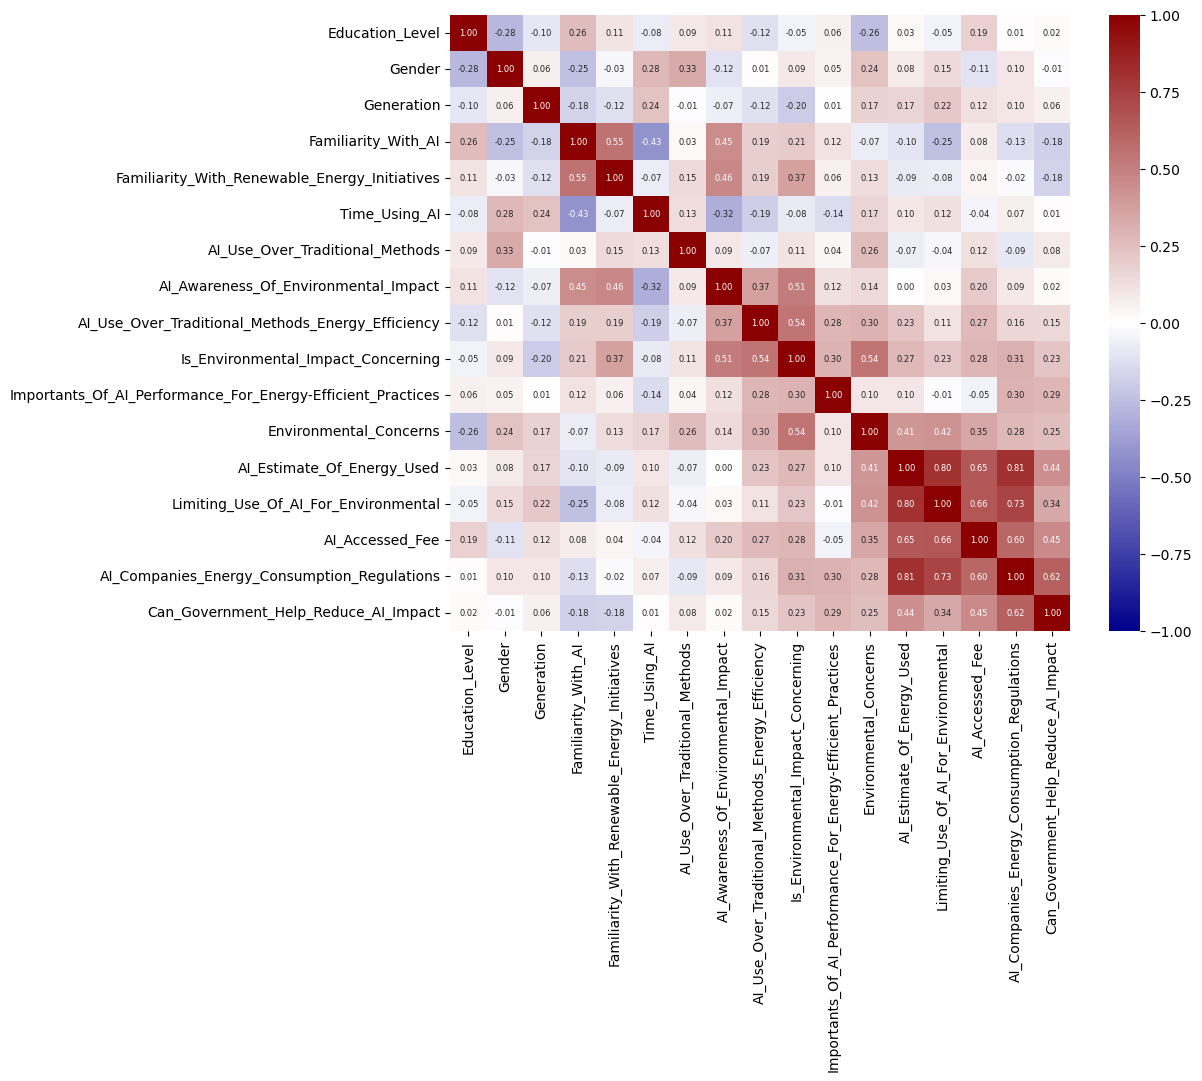

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,8))

# Define a custom color map
custom_cmap = LinearSegmentedColormap.from_list("custom", ["darkblue", "white", "darkred"])

# Use Spearman's correlation for ordinal data
sns.heatmap(numrical_df.corr(method='spearman'), annot=True, cmap=custom_cmap, fmt=".2f", vmin=-1, vmax=1, annot_kws={"size":6})

plt.show()


# Research Question One
## How aware are users of the environmental impact of AI, particularly energy consumption and water usage in data centers?

In [32]:
 #Select relevant columns
questions = ["Q11_AI_Use_Over_Traditional_Methods",
            "Q12_AI_Awareness_Of_Environmental_Impact",
            "Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency"]

# Compute frequency distribution
for q in questions:
    print(f"Frequency distribution for {q}:")
    freq_table = dropped_objects_df[q].value_counts(dropna=False)  # Includes NaN responses
    percent_table = dropped_objects_df[q].value_counts(normalize=True, dropna=False) * 100
    print(pd.DataFrame({"Count": freq_table, "Percentage": percent_table}).to_string())
    print("\n" + "="*50 + "\n")



Frequency distribution for Q11_AI_Use_Over_Traditional_Methods:
                                     Count  Percentage
Q11_AI_Use_Over_Traditional_Methods                   
Yes                                     38   74.509804
No                                      12   23.529412
No Response                              1    1.960784


Frequency distribution for Q12_AI_Awareness_Of_Environmental_Impact:
                                          Count  Percentage
Q12_AI_Awareness_Of_Environmental_Impact                   
Somewhat Aware                               17   33.333333
Not Aware                                    14   27.450980
Moderately Aware                             10   19.607843
Very Aware                                    6   11.764706
Extremely Aware                               2    3.921569
No Response                                   2    3.921569


Frequency distribution for Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency:
                          

In [33]:
import pandas as pd
import plotly.graph_objects as go

# Define the questions
questions = [
    "Q11_AI_Use_Over_Traditional_Methods",
    "Q12_AI_Awareness_Of_Environmental_Impact",
    "Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency"
]

# Prepare the data: count and percentage distribution for each question
combined_data = []

# Iterate over each question and compute counts and percentages
for q in questions:
    # Get the frequency counts (including NaN)
    freq_table = dropped_objects_df[q].value_counts(dropna=False)
    
    # Calculate percentages
    percentage_table = (freq_table / freq_table.sum()) * 100
    
    # Create a DataFrame for each question's response distribution
    question_data = pd.DataFrame({
        'Response': freq_table.index,
        'Count': freq_table.values,
        'Percentage': percentage_table.values,
        'Question': [q] * len(freq_table)
    })
    
    # Append the data to the combined list
    combined_data.append(question_data)

# Combine all questions' data into a single DataFrame
combined_df = pd.concat(combined_data, ignore_index=True)

# Initialize figure using Plotly
fig = go.Figure()

# Add pie charts for each question (but initially hide all except the first one)
for i, question in enumerate(questions):
    question_data = combined_df[combined_df['Question'] == question]
    
    fig.add_trace(go.Pie(
        labels=question_data['Response'], 
        values=question_data['Percentage'], 
        name=question, 
        visible=True if i == 0 else 'legendonly',  # Make the first chart visible, others hidden
        hoverinfo="label+percent", 
        textinfo="label+percent"
    ))

# Add a dropdown menu to switch between questions
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': question,
                    'method': 'update',
                    'args': [
                        {'visible': [True if q == question else False for q in questions]},
                        {'title': f'AI Awareness & Use Responses for {question}'}
                    ]
                } for question in questions
            ],
            'direction': 'down',
            'showactive': True,
            'active': 0
        }
    ],
    title="AI Awareness & Use Responses (Select a Question)"
)

# Show the interactive pie chart
fig.show()

# Save pie chart as a unique HTML file
fig.write_html(f"interactive_pie_chart.html")


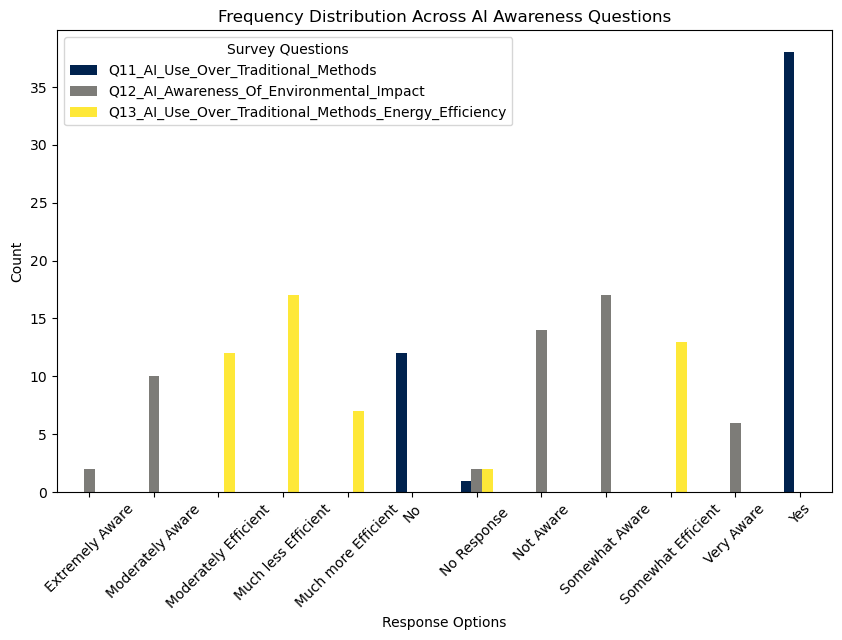

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
questions = ["Q11_AI_Use_Over_Traditional_Methods",
            "Q12_AI_Awareness_Of_Environmental_Impact",
            "Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency"]

# Compute frequency distribution for each question
freq_df = pd.DataFrame({q: dropped_objects_df[q].value_counts() for q in questions}).fillna(0)

# Plot grouped bar chart
freq_df.plot(kind="bar", figsize=(10, 6), colormap="cividis")
plt.xlabel("Response Options")
plt.ylabel("Count")
plt.title("Frequency Distribution Across AI Awareness Questions")
plt.xticks(rotation=45)
plt.legend(title="Survey Questions")
plt.show()


The bar chart illustrates the frequency distribution of responses to three AI-related survey questions: AI use over traditional methods, AI awareness of environmental impact, and AI's energy efficiency compared to traditional methods. The results indicate a strong preference for AI adoption, as the highest response count for Q11 ("AI Use Over Traditional Methods") is for "Yes." In contrast, responses for Q12 ("AI Awareness of Environmental Impact") are more evenly distributed, with many respondents identifying as "Somewhat Aware" or "Moderately Aware," but fewer selecting "Extremely Aware." The responses for Q13 ("AI Use Over Traditional Methods for Energy Efficiency") show a mixed perception, with noticeable peaks at both "Much Less Efficient" and "Moderately Efficient," suggesting divided opinions on AI's energy efficiency. Additionally, while "No Response" appears across all categories, it is not a dominant trend. Overall, the results indicate strong AI adoption but varying levels of awareness and differing views on its environmental and energy efficiency impacts.

###  Survey Question 11 : Do you use generative AI tools for tasks that could be completed using traditional software or methods?

In [35]:
from scipy.stats import chi2_contingency

# Define demographic variables to test
demographic_vars = ['Q1_Education_Level', "Q5_Familiarity_With_AI", "Q6_Familiarity_With_Renewable_Energy_Initiatives"]

for demo in demographic_vars:
    print(f"Chi-square test between {demo} and AI Awareness (Q11):")
    
    # Create a contingency table
    contingency_table = pd.crosstab(dropped_objects_df[demo], df["Q11_AI_Use_Over_Traditional_Methods"])
    
    # Run Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")
    
    # Interpretation
    if p < 0.05:
        print(f"→ Significant association found (p < 0.05) between {demo} and AI Awareness (Q11)\n")
    else:
        print(f"→ No significant association (p ≥ 0.05) between {demo} and AI Awareness (Q11)\n")
    
    print("="*50 + "\n")


Chi-square test between Q1_Education_Level and AI Awareness (Q11):
Chi-square: 6.7871, p-value: 0.5598
→ No significant association (p ≥ 0.05) between Q1_Education_Level and AI Awareness (Q11)


Chi-square test between Q5_Familiarity_With_AI and AI Awareness (Q11):
Chi-square: 4.9899, p-value: 0.7587
→ No significant association (p ≥ 0.05) between Q5_Familiarity_With_AI and AI Awareness (Q11)


Chi-square test between Q6_Familiarity_With_Renewable_Energy_Initiatives and AI Awareness (Q11):
Chi-square: 1.9359, p-value: 0.7475
→ No significant association (p ≥ 0.05) between Q6_Familiarity_With_Renewable_Energy_Initiatives and AI Awareness (Q11)




In [36]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [37]:
import plotly.express as px
import pandas as pd

# Define demographic variables to test
demographic_vars = ['Q1_Education_Level', "Q5_Familiarity_With_AI", "Q6_Familiarity_With_Renewable_Energy_Initiatives"]

# Dictionary to store figures
figs = {}

for i, demo in enumerate(demographic_vars):
    # Create a contingency table
    contingency_table = pd.crosstab(dropped_objects_df[demo], df["Q11_AI_Use_Over_Traditional_Methods"], normalize="index")

    # Convert to a DataFrame
    contingency_df = contingency_table.reset_index()

    # Create an interactive bar chart using Plotly
    fig = px.bar(
        contingency_df,
        x=demo,
        y=contingency_table.columns,
        title=f"AI Awareness (Q11) by {demo}",
        barmode="stack",
        labels={"value": "Proportion"},
        color_discrete_sequence=px.colors.qualitative.Vivid
    )

    # Store figure
    figs[demo] = fig

    # Save each chart as a unique HTML file
    fig.write_html(f"interactive_chart_{i}.html")

with open("all_interactive_charts.html", "w") as f:
    for i, demo in enumerate(demographic_vars):
        f.write(figs[demo].to_html(full_html=False, include_plotlyjs="cdn"))



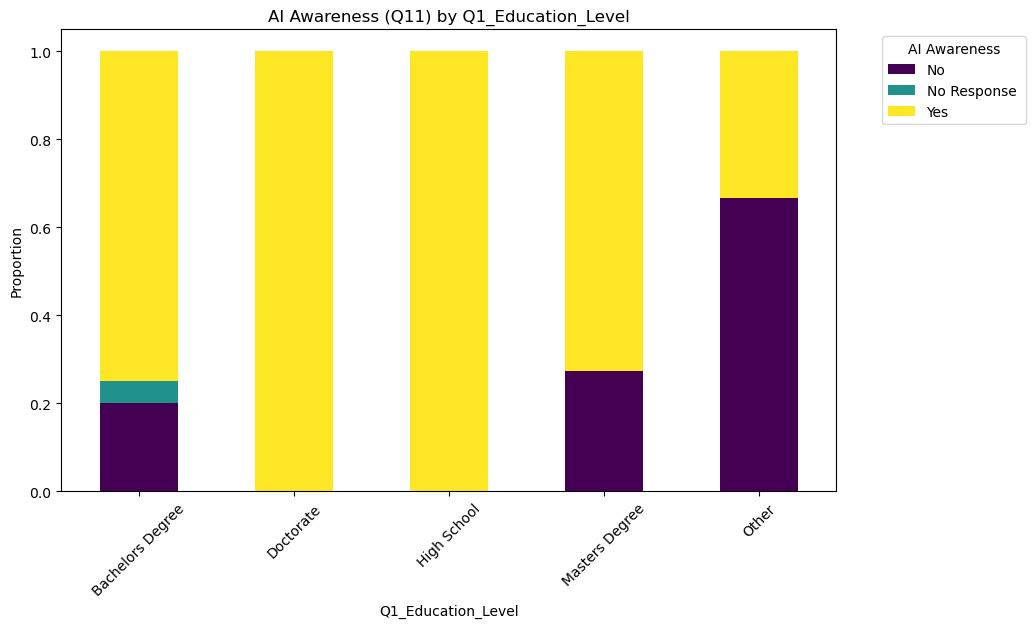

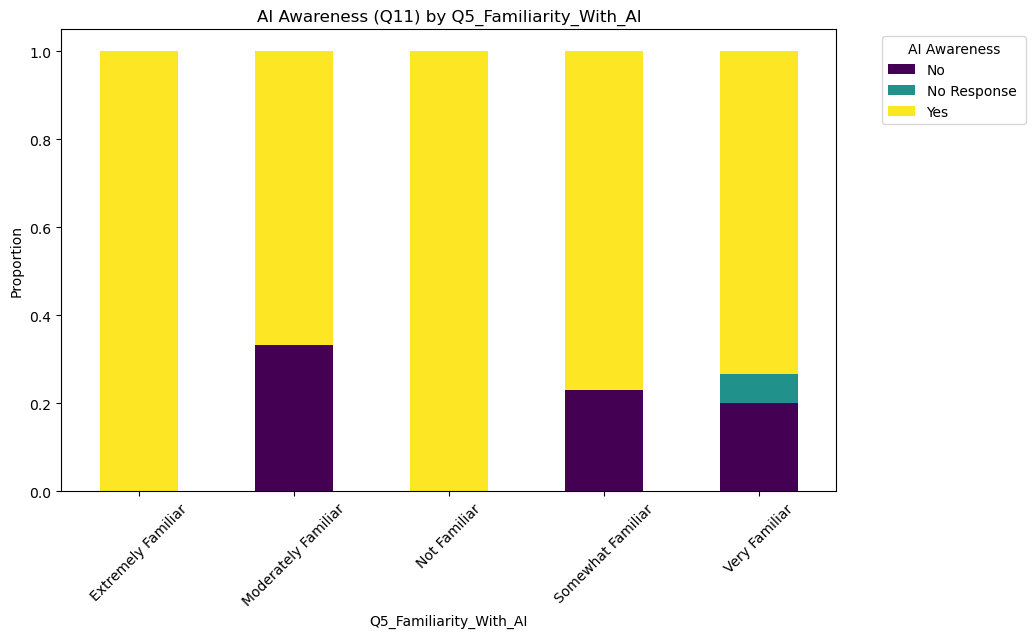

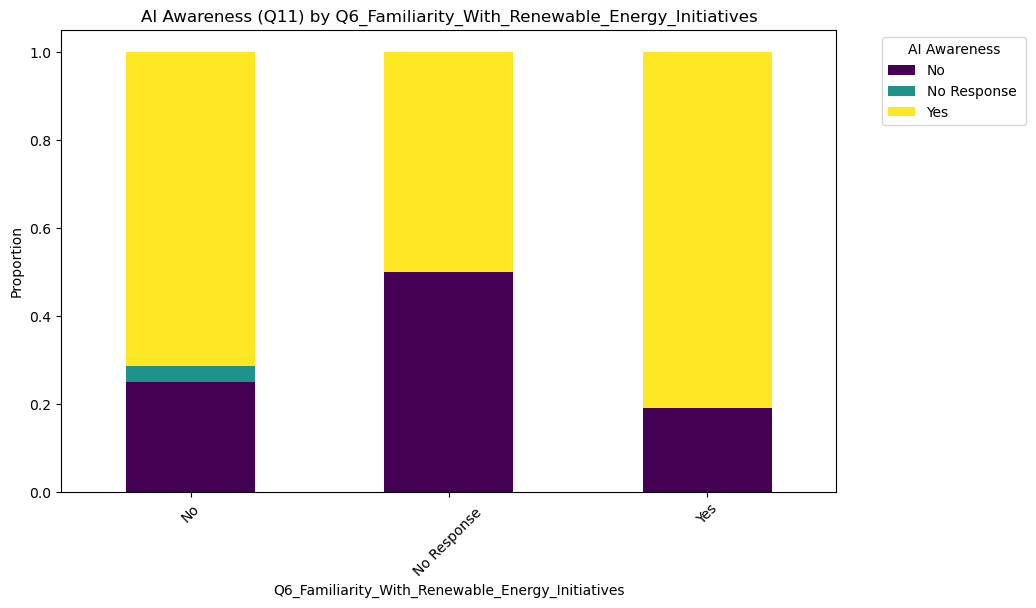

In [38]:
import matplotlib.pyplot as plt

# Define demographic variables to test
demographic_vars = ['Q1_Education_Level', "Q5_Familiarity_With_AI", "Q6_Familiarity_With_Renewable_Energy_Initiatives"]

for demo in demographic_vars:
    # Create a contingency table
    contingency_table = pd.crosstab(dropped_objects_df[demo], df["Q11_AI_Use_Over_Traditional_Methods"], normalize="index")

    # Plot
    contingency_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
    plt.title(f"AI Awareness (Q11) by {demo}")
    plt.xlabel(demo)
    plt.ylabel("Proportion")
    plt.legend(title="AI Awareness", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()


The stacked bar chart illustrates responses to Q11: "Do you use generative AI tools for tasks that could be completed using traditional software or methods?" segmented by education level. The responses are categorized as "Yes" (yellow), "No" (purple), and "No Response" (teal). Across all education levels, the majority of respondents report using generative AI tools, with near-total adoption among those with a Doctorate and High School education. The Bachelor’s Degree and Master’s Degree groups show a small but notable proportion of individuals who do not use generative AI, with the Master's group having a slightly higher percentage of "No" responses. The "Other" category stands out, having the highest proportion of "No" responses, suggesting that individuals outside traditional education pathways may be less likely to adopt generative AI tools. Overall, the data indicates a strong correlation between education level and AI adoption, though those in non-traditional education categories may be less likely to use generative AI tools over traditional methods.

The stacked bar chart presents responses to Q11: "Do you use generative AI tools for tasks that could be completed using traditional software or methods?" segmented by Q5: "How familiar are you with artificial intelligence technologies?" The majority of respondents across all familiarity levels report using generative AI tools (yellow). Those who are Extremely Familiar, Not Familiar, and Very Familiar with AI exhibit nearly universal adoption. However, individuals who are Moderately Familiar and Somewhat Familiar show a small but notable proportion of "No" responses (purple), indicating that some within these groups still prefer traditional methods. Additionally, the Very Familiar group contains a small percentage of "No Response" (teal), suggesting a degree of uncertainty or non-participation. Overall, the data indicates that greater AI familiarity correlates with higher generative AI tool adoption, though those with moderate familiarity may be more hesitant in fully embracing these technologies.

The stacked bar chart visualizes responses to Q11: "Do you use generative AI tools for tasks that could be completed using traditional software or methods?" based on Q6: "Are you familiar with renewable energy initiatives in the technology sector?" The majority of respondents across all familiarity levels reported using generative AI tools (yellow). Those who indicated familiarity with renewable energy initiatives had the highest proportion of AI tool usage, with a smaller fraction responding "No" (purple). Among respondents unfamiliar with renewable energy initiatives, there is a slightly higher proportion of "No" responses and a small percentage of "No Response" (teal). Interestingly, those who did not respond to Q6 showed a nearly equal split between "Yes" and "No" for AI usage. This suggests a possible correlation between familiarity with renewable energy initiatives and a greater tendency to adopt generative AI tools, though some hesitation remains among those with less familiarity.

###  Survey Question 12 : How aware are you of the energy consumption and environmental impact of AI systems (e.g., training models, running inference)?


In [39]:
from scipy.stats import chi2_contingency

# Define demographic variables to test
demographic_vars = ['Q1_Education_Level', "Q5_Familiarity_With_AI", "Q6_Familiarity_With_Renewable_Energy_Initiatives"]

for demo in demographic_vars:
    print(f"Chi-square test between {demo} and AI Awareness Of Environmental Impact (Q12):")
    
    # Create a contingency table
    contingency_table = pd.crosstab(dropped_objects_df[demo], dropped_objects_df["Q12_AI_Awareness_Of_Environmental_Impact"])
    
    # Run Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")
    
    # Interpretation
    if p < 0.05:
        print(f"→ Significant association found (p < 0.05) between {demo} and AI Awareness (Q11)\n")
    else:
        print(f"→ No significant association (p ≥ 0.05) between {demo} and AI Awareness (Q11)\n")
    
    print("="*50 + "\n")

Chi-square test between Q1_Education_Level and AI Awareness Of Environmental Impact (Q12):
Chi-square: 18.2690, p-value: 0.5697
→ No significant association (p ≥ 0.05) between Q1_Education_Level and AI Awareness (Q11)


Chi-square test between Q5_Familiarity_With_AI and AI Awareness Of Environmental Impact (Q12):
Chi-square: 28.4731, p-value: 0.0987
→ No significant association (p ≥ 0.05) between Q5_Familiarity_With_AI and AI Awareness (Q11)


Chi-square test between Q6_Familiarity_With_Renewable_Energy_Initiatives and AI Awareness Of Environmental Impact (Q12):
Chi-square: 14.9379, p-value: 0.1343
→ No significant association (p ≥ 0.05) between Q6_Familiarity_With_Renewable_Energy_Initiatives and AI Awareness (Q11)




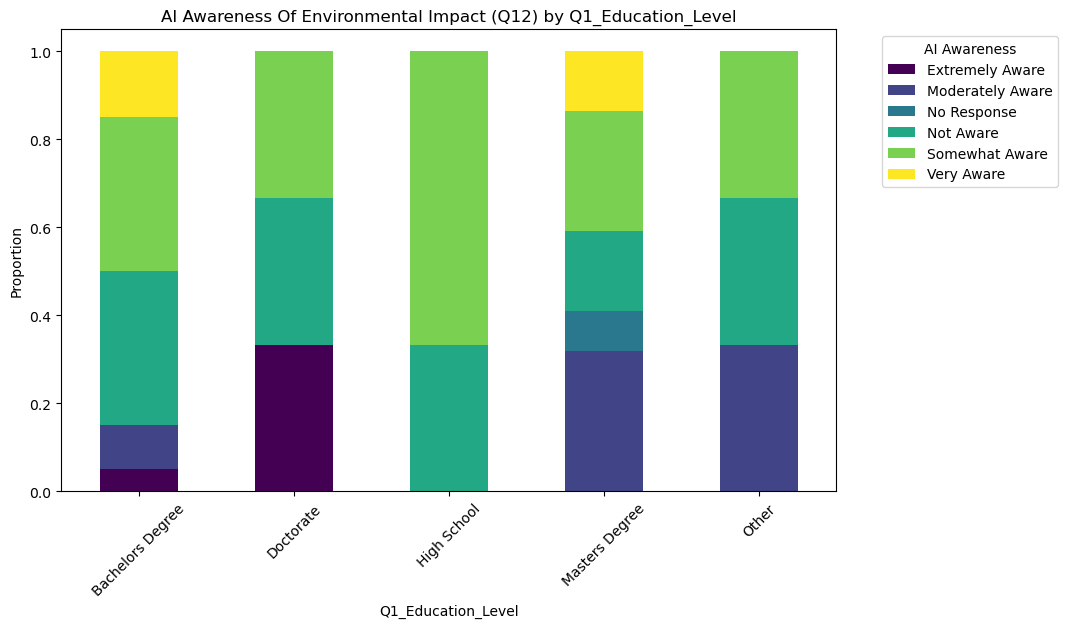

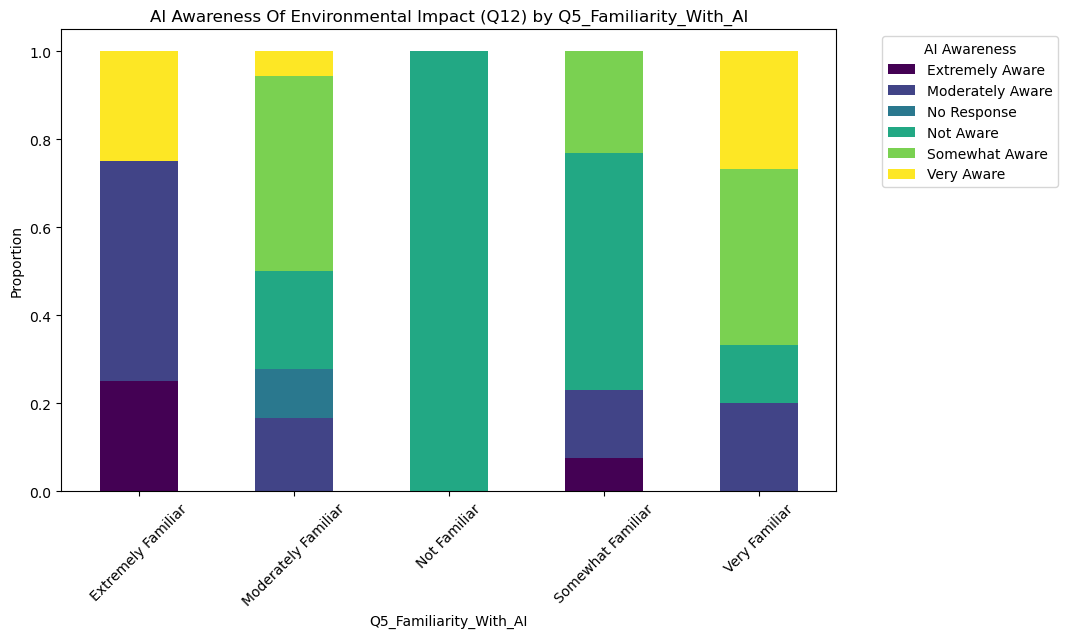

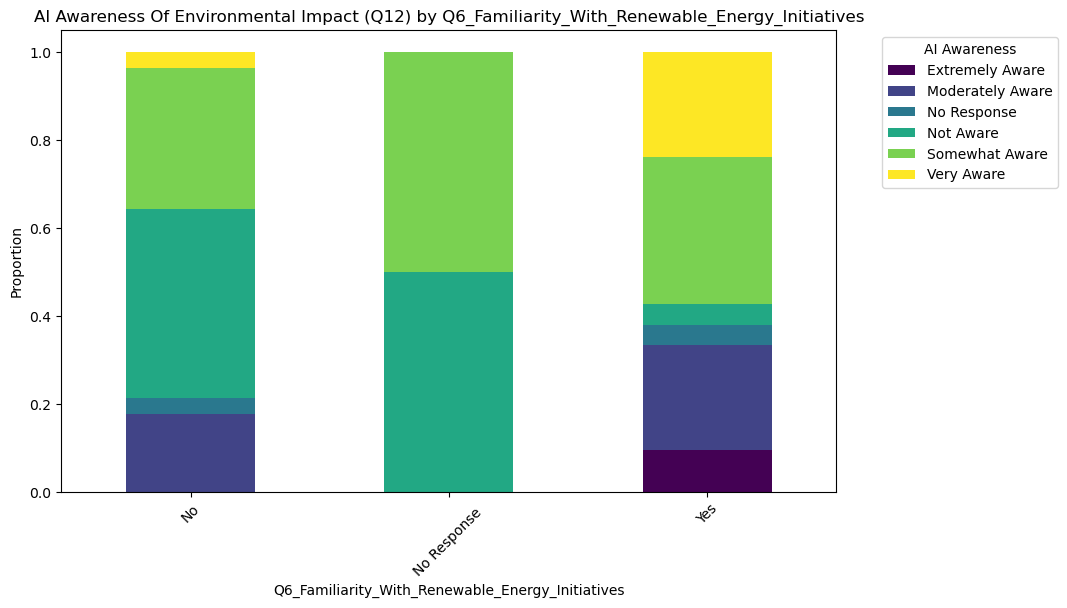

In [40]:
import matplotlib.pyplot as plt

# Define demographic variables to test
demographic_vars = ['Q1_Education_Level', "Q5_Familiarity_With_AI", "Q6_Familiarity_With_Renewable_Energy_Initiatives"]

for demo in demographic_vars:
    # Create a contingency table
    contingency_table = pd.crosstab(dropped_objects_df[demo], dropped_objects_df["Q12_AI_Awareness_Of_Environmental_Impact"], normalize="index")

    # Plot
    contingency_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
    plt.title(f"AI Awareness Of Environmental Impact (Q12) by {demo}")
    plt.xlabel(demo)
    plt.ylabel("Proportion")
    plt.legend(title="AI Awareness", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()


### Survey Question 13 : How do you perceive the energy efficiency of AI-driven tools (e.g., ChatGPT, virtual assistants) compared to traditional search engines?

In [41]:
from scipy.stats import chi2_contingency

# Define demographic variables to test
demographic_vars = ['Q1_Education_Level', "Q5_Familiarity_With_AI", "Q6_Familiarity_With_Renewable_Energy_Initiatives"]

for demo in demographic_vars:
    print(f"Chi-square test between {demo} and AI Use Over Traditional Methods Energy Efficiency (Q13):")
    
    # Create a contingency table
    contingency_table = pd.crosstab(dropped_objects_df[demo], dropped_objects_df["Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency"])
    
    # Run Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")
    
    # Interpretation
    if p < 0.05:
        print(f"→ Significant association found (p < 0.05) between {demo} and AI Awareness (Q11)\n")
    else:
        print(f"→ No significant association (p ≥ 0.05) between {demo} and AI Awareness (Q11)\n")
    
    print("="*50 + "\n")

Chi-square test between Q1_Education_Level and AI Use Over Traditional Methods Energy Efficiency (Q13):
Chi-square: 20.1844, p-value: 0.2120
→ No significant association (p ≥ 0.05) between Q1_Education_Level and AI Awareness (Q11)


Chi-square test between Q5_Familiarity_With_AI and AI Use Over Traditional Methods Energy Efficiency (Q13):
Chi-square: 18.9388, p-value: 0.2718
→ No significant association (p ≥ 0.05) between Q5_Familiarity_With_AI and AI Awareness (Q11)


Chi-square test between Q6_Familiarity_With_Renewable_Energy_Initiatives and AI Use Over Traditional Methods Energy Efficiency (Q13):
Chi-square: 11.4950, p-value: 0.1752
→ No significant association (p ≥ 0.05) between Q6_Familiarity_With_Renewable_Energy_Initiatives and AI Awareness (Q11)




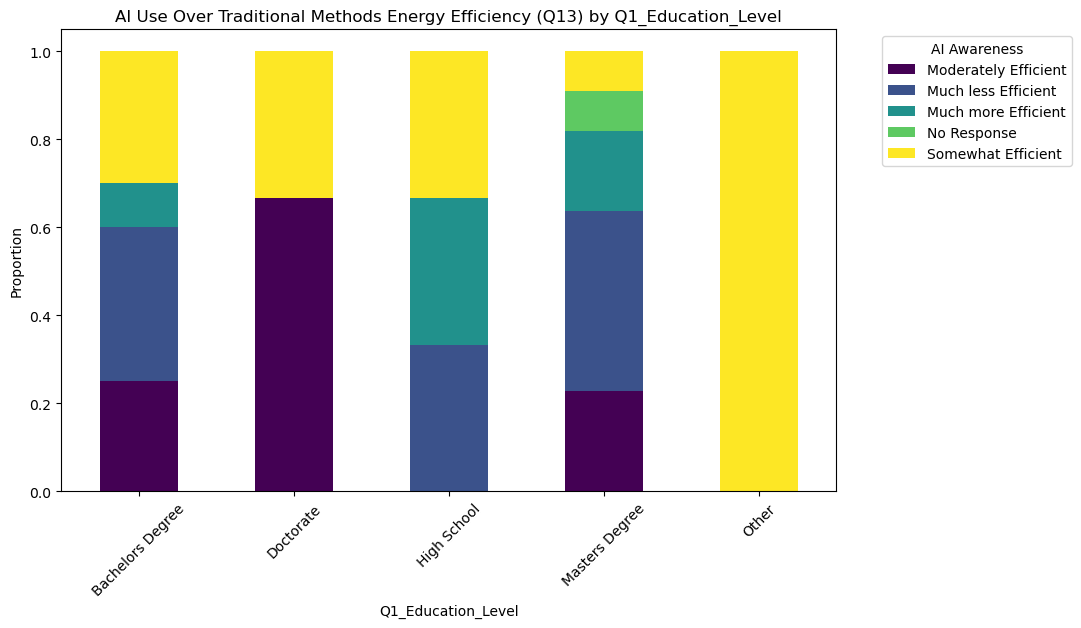

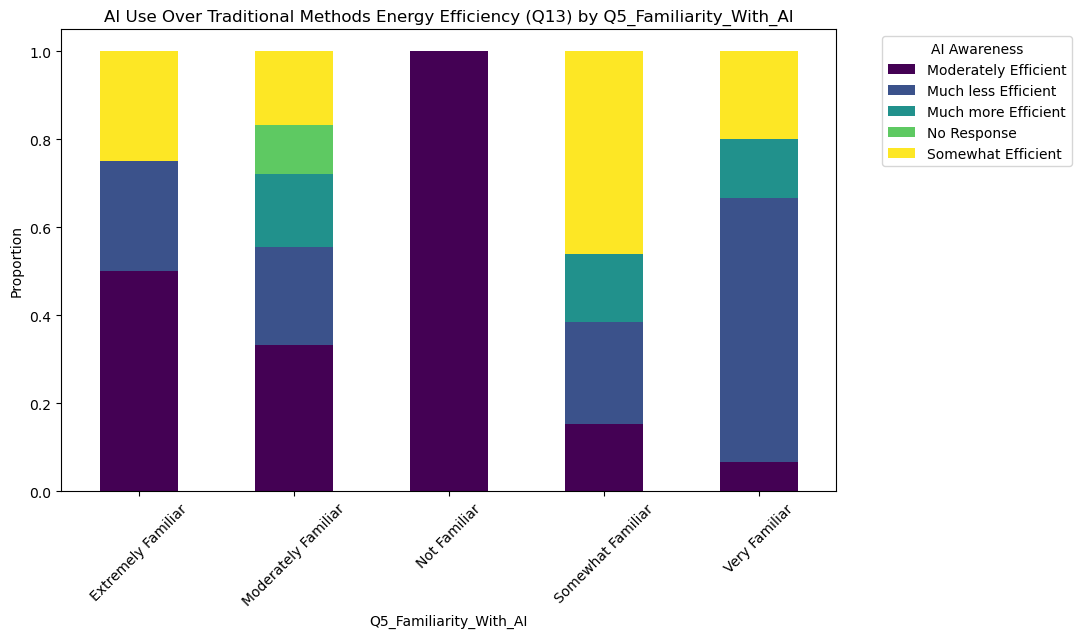

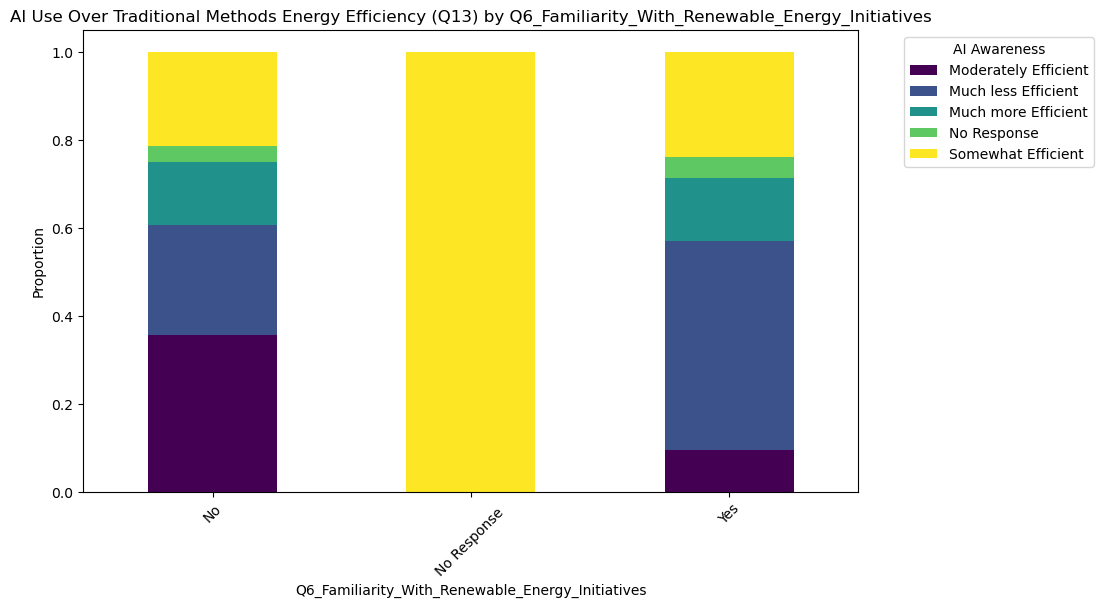

In [42]:
import matplotlib.pyplot as plt

# Define demographic variables to test
demographic_vars = ['Q1_Education_Level', "Q5_Familiarity_With_AI", "Q6_Familiarity_With_Renewable_Energy_Initiatives"]

for demo in demographic_vars:
    # Create a contingency table
    contingency_table = pd.crosstab(dropped_objects_df[demo], dropped_objects_df["Q13_AI_Use_Over_Traditional_Methods_Energy_Efficiency"], normalize="index")

    # Plot
    contingency_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
    plt.title(f"AI Use Over Traditional Methods Energy Efficiency (Q13) by {demo}")
    plt.xlabel(demo)
    plt.ylabel("Proportion")
    plt.legend(title="AI Awareness", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

# Research Question Two: 
## To what extent are users willing to accept trade-offs (e.g., performance limitations, usage restrictions, small fees) to support energy-efficient AI solutions?

In [43]:
# Get frequency counts for categorical responses
freq_Q14 = dropped_objects_df["Q14_Is_Environmental_Impact_Concerning"].value_counts()
freq_Q17 = dropped_objects_df["AI_Estimate_Of_Energy_Used"].value_counts()
freq_Q18 = dropped_objects_df["Limiting_Use_Of_AI_For_Environmental"].value_counts()

# Get mean scores (if responses are numerical)
mean_Q17 = dropped_objects_df["AI_Estimate_Of_Energy_Used"].mean()
mean_Q18 = dropped_objects_df["Limiting_Use_Of_AI_For_Environmental"].mean()

# Display results
print("Frequency of Q14 responses:\n", freq_Q14)
print("\nFrequency of Q17 responses:\n", freq_Q17)
print("\nFrequency of Q18 responses:\n", freq_Q18)

print("\nMean of Q17:", mean_Q17)
print("Mean of Q18:", mean_Q18)

Frequency of Q14 responses:
 Q14_Is_Environmental_Impact_Concerning
Extremely agree               21
Moderately agree              17
Neither agree nor disagree     6
Slightly agree                 5
No Response                    2
Name: count, dtype: int64

Frequency of Q17 responses:
 AI_Estimate_Of_Energy_Used
2    37
1     8
0     6
Name: count, dtype: int64

Frequency of Q18 responses:
 Limiting_Use_Of_AI_For_Environmental
3    28
1     9
2     8
0     6
Name: count, dtype: int64

Mean of Q17: 1.607843137254902
Mean of Q18: 2.1372549019607843


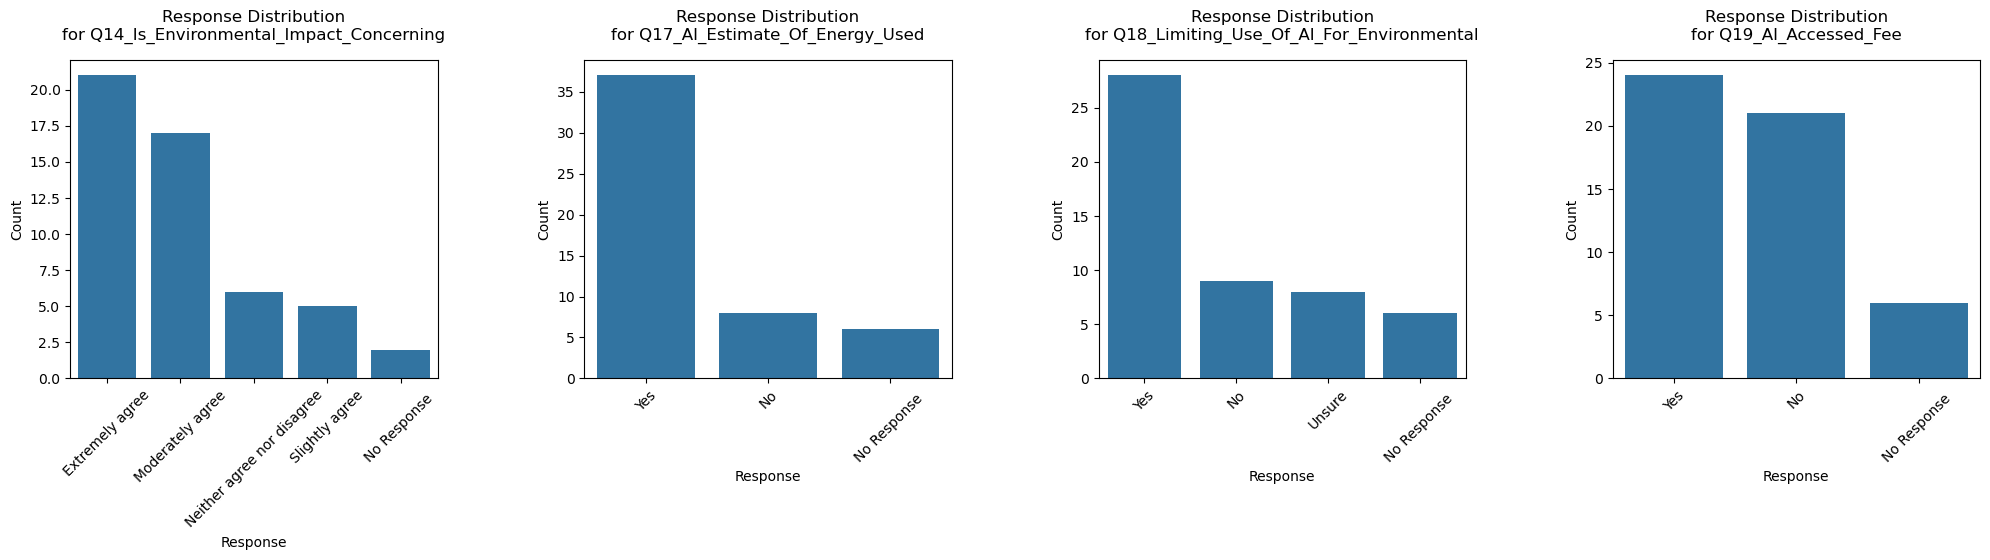

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size for better spacing
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

questions = [
    "Q14_Is_Environmental_Impact_Concerning", 
    "Q17_AI_Estimate_Of_Energy_Used", 
    "Q18_Limiting_Use_Of_AI_For_Environmental",
    "Q19_AI_Accessed_Fee"
]

for i, q in enumerate(questions):
    sns.barplot(x=dropped_objects_df[q].value_counts().index, 
                y=dropped_objects_df[q].value_counts().values, 
                ax=axes[i])
    
    # Adjust title padding to avoid overlap
    axes[i].set_title(f"Response Distribution\nfor {q}", fontsize=12, pad=15)
    
    axes[i].set_xlabel("Response", fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)  

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.4)  # Increase horizontal space between plots

plt.show()


In [45]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["AI_Estimate_Of_Energy_Used", "Limiting_Use_Of_AI_For_Environmental"]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["AI_Estimate_Of_Energy_Used"], df_clean["Limiting_Use_Of_AI_For_Environmental"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: 0.802, p-value: 0.000


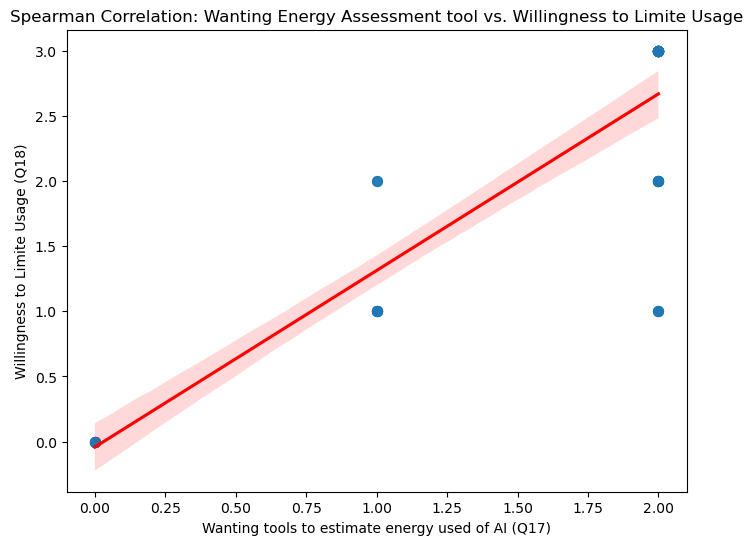

In [46]:
import numpy as np

# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=numrical_df["AI_Estimate_Of_Energy_Used"], y=numrical_df["Limiting_Use_Of_AI_For_Environmental"], scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Spearman Correlation: Wanting Energy Assessment tool vs. Willingness to Limite Usage")
plt.xlabel("Wanting tools to estimate energy used of AI (Q17)")
plt.ylabel("Willingness to Limite Usage (Q18)")
plt.show()

In [47]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["Is_Environmental_Impact_Concerning", "Limiting_Use_Of_AI_For_Environmental"]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["Is_Environmental_Impact_Concerning"], df_clean["Limiting_Use_Of_AI_For_Environmental"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: 0.226, p-value: 0.111


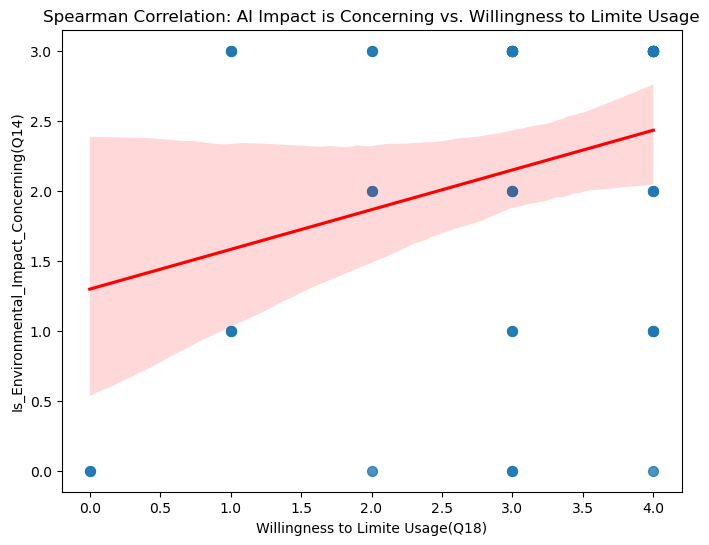

In [48]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=numrical_df["Is_Environmental_Impact_Concerning"], y=numrical_df["Limiting_Use_Of_AI_For_Environmental"], scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Spearman Correlation: AI Impact is Concerning vs. Willingness to Limite Usage")
plt.xlabel("Willingness to Limite Usage(Q18)")
plt.ylabel("Is_Environmental_Impact_Concerning(Q14)")
plt.show()

In [49]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["Is_Environmental_Impact_Concerning", "AI_Estimate_Of_Energy_Used"]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["Is_Environmental_Impact_Concerning"], df_clean["AI_Estimate_Of_Energy_Used"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: 0.273, p-value: 0.052


In [50]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["AI_Accessed_Fee","Is_Environmental_Impact_Concerning", ]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["AI_Accessed_Fee"],df_clean["Is_Environmental_Impact_Concerning"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: 0.284, p-value: 0.043


In [51]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["AI_Accessed_Fee","Limiting_Use_Of_AI_For_Environmental", ]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["AI_Accessed_Fee"],df_clean["Limiting_Use_Of_AI_For_Environmental"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: 0.662, p-value: 0.000


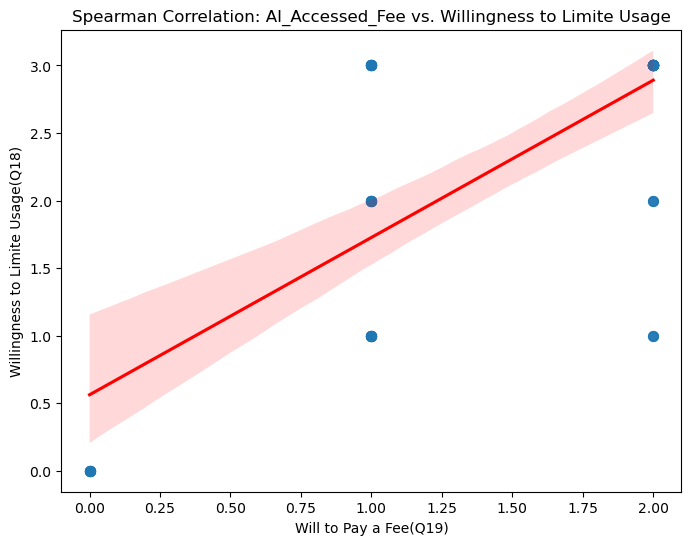

In [52]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=numrical_df["AI_Accessed_Fee"], y=numrical_df["Limiting_Use_Of_AI_For_Environmental"], scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Spearman Correlation: AI_Accessed_Fee vs. Willingness to Limite Usage")
plt.xlabel("Will to Pay a Fee(Q19)")
plt.ylabel("Willingness to Limite Usage(Q18)")
plt.show()

In [53]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["AI_Accessed_Fee","AI_Estimate_Of_Energy_Used", ]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["AI_Accessed_Fee"],df_clean["AI_Estimate_Of_Energy_Used"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: 0.649, p-value: 0.000


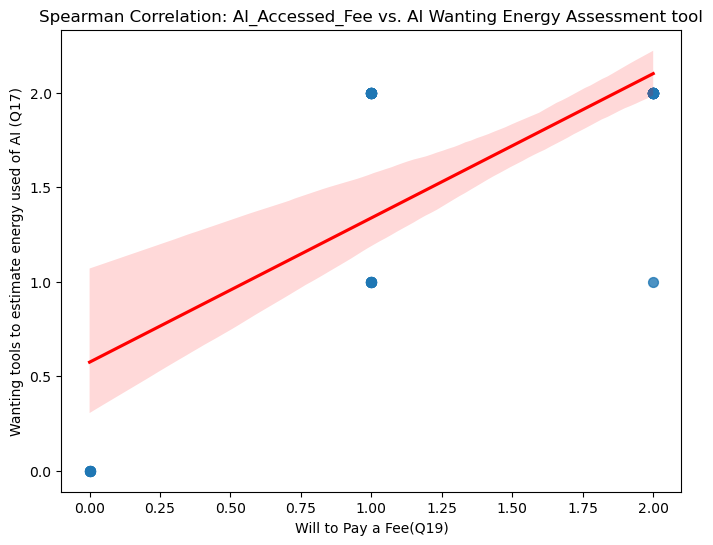

In [54]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=numrical_df["AI_Accessed_Fee"], y=numrical_df["AI_Estimate_Of_Energy_Used"], scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Spearman Correlation: AI_Accessed_Fee vs. AI Wanting Energy Assessment tool")
plt.xlabel("Will to Pay a Fee(Q19)")
plt.ylabel("Wanting tools to estimate energy used of AI (Q17)")
plt.show()

In [55]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["AI_Estimate_Of_Energy_Used","Familiarity_With_AI", ]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["AI_Estimate_Of_Energy_Used"],df_clean["Familiarity_With_AI"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: -0.102, p-value: 0.475


In [56]:
from scipy.stats import spearmanr

# Drop NaN values for correlation analysis
df_clean = numrical_df[["AI_Estimate_Of_Energy_Used","Familiarity_With_Renewable_Energy_Initiatives", ]].dropna()

# Compute Spearman's correlation
corr, p_value = spearmanr(df_clean["AI_Estimate_Of_Energy_Used"],df_clean["Familiarity_With_Renewable_Energy_Initiatives"])

print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: -0.085, p-value: 0.552


In [57]:
import scipy.stats as stats

# Create contingency tables
contingency_AI_familiarity = pd.crosstab(dropped_objects_df["Q17_AI_Estimate_Of_Energy_Used"], dropped_objects_df["Q5_Familiarity_With_AI"])
contingency_environmental_concern = pd.crosstab(dropped_objects_df["Q17_AI_Estimate_Of_Energy_Used"], dropped_objects_df["Q6_Familiarity_With_Renewable_Energy_Initiatives"])

# Perform Chi-Square tests
chi2_1, p1, _, _ = stats.chi2_contingency(contingency_AI_familiarity)
chi2_2, p2, _, _ = stats.chi2_contingency(contingency_environmental_concern)

print(f"Chi-Square test (Q17 vs AI Familiarity): χ²={chi2_1:.3f}, p={p1:.3f}")
print(f"Chi-Square test (Q17 vs Environmental Concern): χ²={chi2_2:.3f}, p={p2:.3f}")

Chi-Square test (Q17 vs AI Familiarity): χ²=7.811, p=0.452
Chi-Square test (Q17 vs Environmental Concern): χ²=2.849, p=0.583


In [58]:
import scipy.stats as stats
import pandas as pd

# Create contingency tables
contingency_AI_familiarity = pd.crosstab(dropped_objects_df["Q17_AI_Estimate_Of_Energy_Used"], dropped_objects_df["Q5_Familiarity_With_AI"])
contingency_environmental_concern = pd.crosstab(dropped_objects_df["Q17_AI_Estimate_Of_Energy_Used"], dropped_objects_df["Q6_Familiarity_With_Renewable_Energy_Initiatives"])

# Ensure the table is 2x2 before applying Fisher’s Exact Test
if contingency_AI_familiarity.shape == (2,2):
    oddsratio_1, p1 = stats.fisher_exact(contingency_AI_familiarity)
    print(f"Fisher's Exact test (Q17 vs AI Familiarity): p={p1:.3f}, Odds Ratio={oddsratio_1:.3f}")
else:
    print("Fisher’s Exact Test requires a 2x2 table. Consider using Chi-Square for larger tables.")

if contingency_environmental_concern.shape == (2,2):
    oddsratio_2, p2 = stats.fisher_exact(contingency_environmental_concern)
    print(f"Fisher's Exact test (Q17 vs Environmental Concern): p={p2:.3f}, Odds Ratio={oddsratio_2:.3f}")
else:
    print("Fisher’s Exact Test requires a 2x2 table. Consider using Chi-Square for larger tables.")


Fisher’s Exact Test requires a 2x2 table. Consider using Chi-Square for larger tables.
Fisher’s Exact Test requires a 2x2 table. Consider using Chi-Square for larger tables.


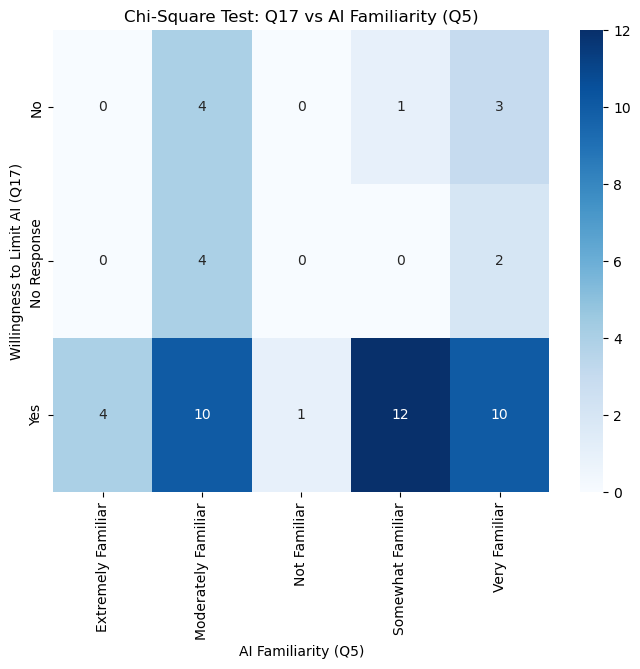

In [59]:

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_AI_familiarity, annot=True, cmap="Blues", fmt="d")
plt.title("Chi-Square Test: Q17 vs AI Familiarity (Q5)")
plt.xlabel("AI Familiarity (Q5)")
plt.ylabel("Willingness to Limit AI (Q17)")
plt.show()

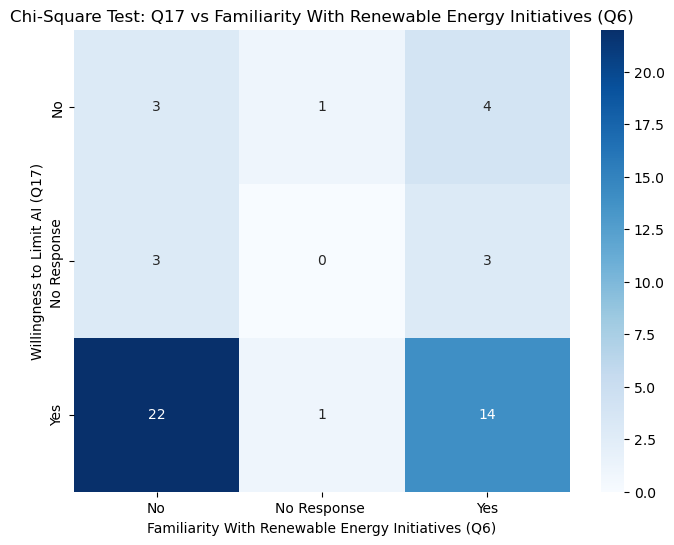

In [60]:

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_environmental_concern , annot=True, cmap="Blues", fmt="d")
plt.title("Chi-Square Test: Q17 vs Familiarity With Renewable Energy Initiatives (Q6)")
plt.xlabel("Familiarity With Renewable Energy Initiatives (Q6)")
plt.ylabel("Willingness to Limit AI (Q17)")
plt.show()

# Research Question Three: 
## Do users believe AI companies should be responsible for reducing their environmental footprint, and do they support regulations to enforce this?

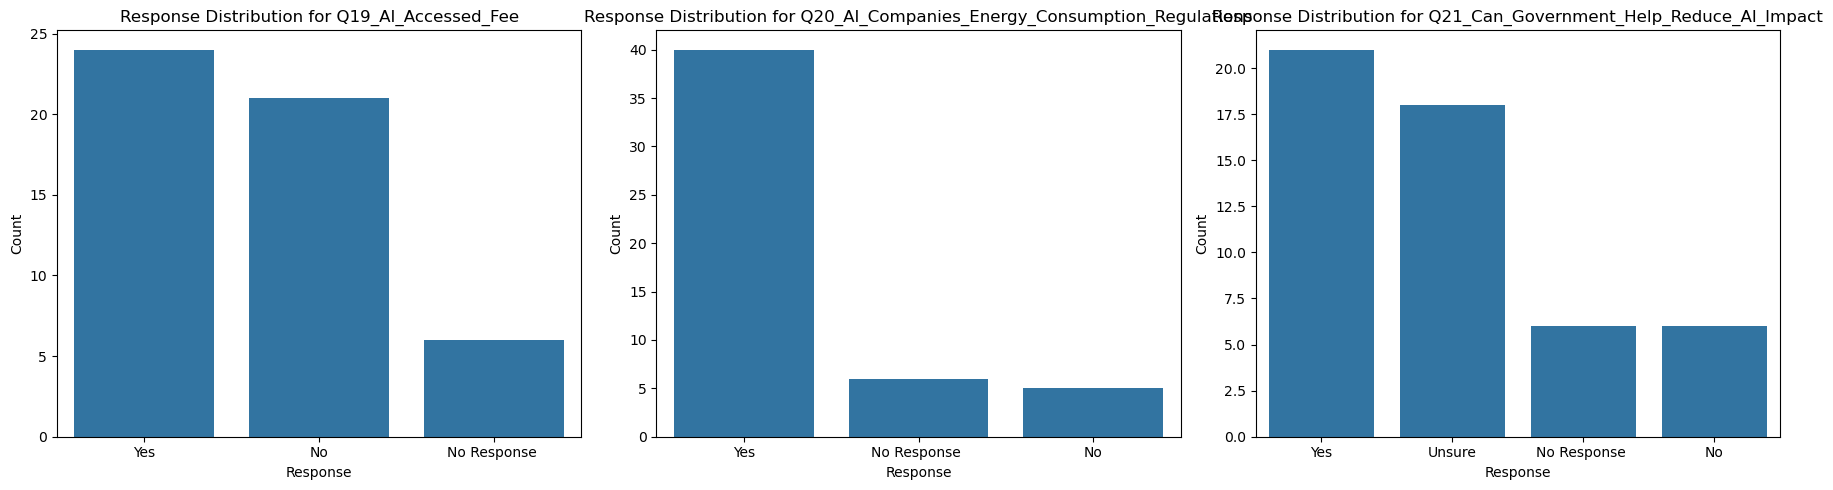

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar charts for Q20, and Q21 responses
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, q in enumerate([ "Q19_AI_Accessed_Fee","Q20_AI_Companies_Energy_Consumption_Regulations",
            "Q21_Can_Government_Help_Reduce_AI_Impact"]):
    sns.barplot(x=dropped_objects_df[q].value_counts().index, y=dropped_objects_df[q].value_counts().values, ax=axes[i])
    axes[i].set_title(f"Response Distribution for {q}")
    axes[i].set_xlabel("Response")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [62]:
numrical_df["AI_Accessed_Fee"].count()*.8

40.800000000000004

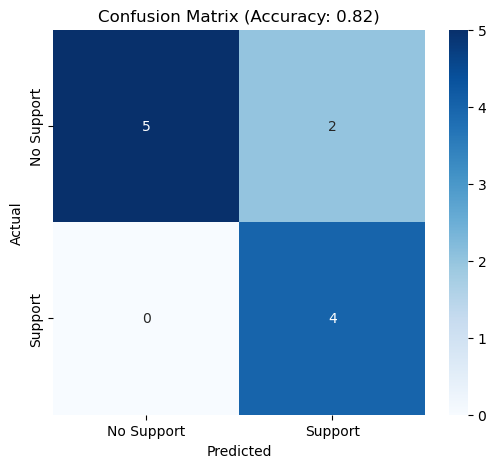

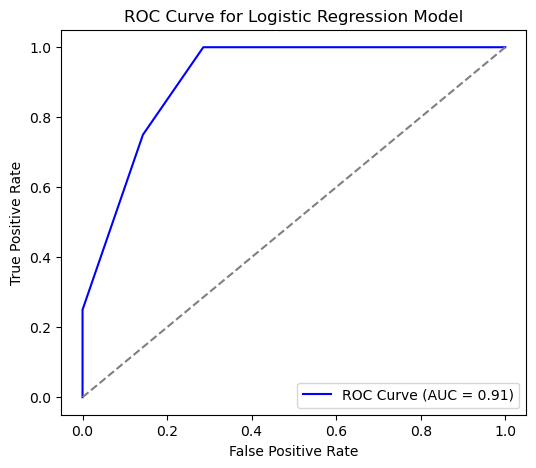

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Convert Q19 to binary (1 = Support, 0 = No Support)
numrical_df["Q19_binary"] = numrical_df["AI_Accessed_Fee"].apply(lambda x: 1 if x == 2 else 0)

# Convert Q12 to numeric (awareness level)
numrical_df["Q12_numeric"] = numrical_df["AI_Awareness_Of_Environmental_Impact"].astype(float)  

# Train-Test Split
X = numrical_df[["Q12_numeric"]]  # Predictor: Awareness of AI’s environmental impact
y = numrical_df["Q19_binary"]  # Target: Support for AI Regulations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Support", "Support"], yticklabels=["No Support", "Support"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

# ROC Curve
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()


The graph is a Receiver Operating Characteristic (ROC) curve for a logistic regression model. Here's a summary:

X-axis (False Positive Rate - FPR): Measures the proportion of negative instances incorrectly classified as positive.
Y-axis (True Positive Rate - TPR): Measures the proportion of positive instances correctly classified.
The blue ROC curve: Represents the model’s performance in distinguishing between classes.
The diagonal dashed line: Represents a random classifier (AUC = 0.5).
AUC (Area Under the Curve) = 0.91: Indicates strong predictive performance, with the model being highly effective at distinguishing between classes.
Overall, the model performs well, as an AUC of 0.91 suggests high classification accuracy.

# Research Question Four: 
## How does familiarity with AI and renewable energy initiatives affect users’ attitudes toward sustainable AI practices?

In [64]:
import pandas as pd
import scipy.stats as stats

 

# Selecting relevant columns
ai_familiarity = numrical_df["Familiarity_With_AI"]  
renewable_familiarity = numrical_df["Familiarity_With_Renewable_Energy_Initiatives"]
ai_impact_concern = numrical_df["AI_Awareness_Of_Environmental_Impact"]

# Spearman Correlation
spearman_corr, spearman_p = stats.spearmanr(ai_familiarity, ai_impact_concern)
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p}")

# Kendall Rank Correlation
kendall_corr, kendall_p = stats.kendalltau(ai_familiarity, ai_impact_concern)
print(f"Kendall Correlation: {kendall_corr}, p-value: {kendall_p}")


Spearman Correlation: 0.44966241263497486, p-value: 0.0009317513732717571
Kendall Correlation: 0.38680727201876725, p-value: 0.0010571487890547833


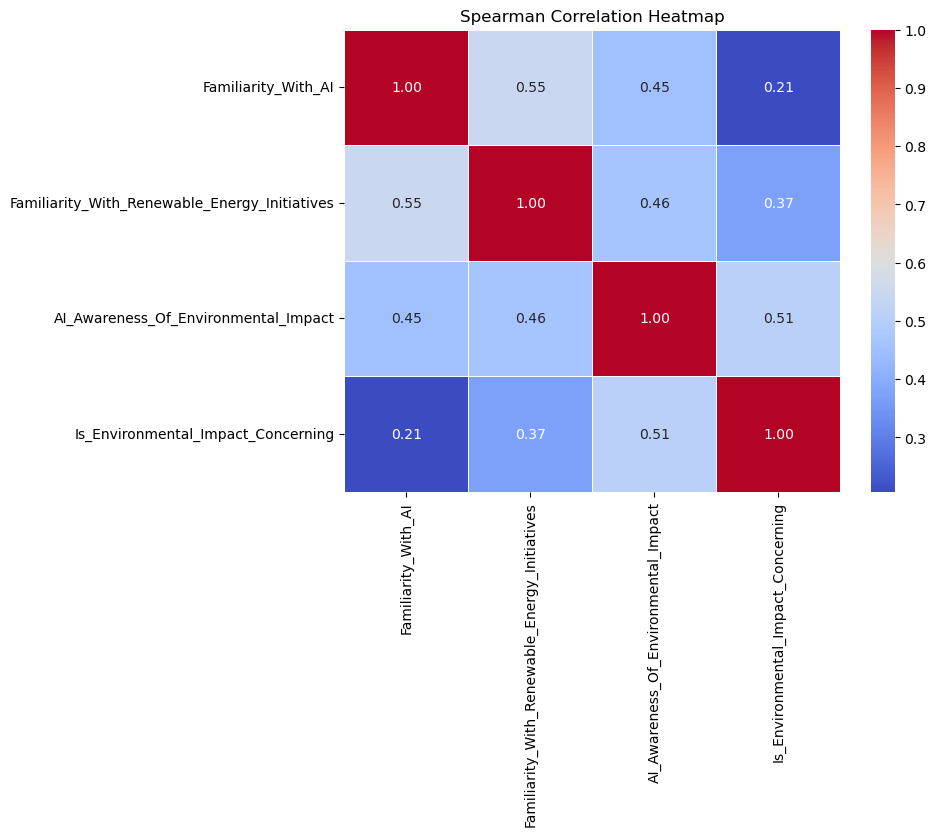

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation
correlation_data = numrical_df[["Familiarity_With_AI","Familiarity_With_Renewable_Energy_Initiatives","AI_Awareness_Of_Environmental_Impact","Is_Environmental_Impact_Concerning"]]

# Compute Spearman correlation matrix
corr_matrix = correlation_data.corr(method="spearman")

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

The Spearman correlation heatmap reveals key relationships between familiarity with AI, familiarity with renewable energy initiatives, awareness of AI’s environmental impact, and concern about its effects. There is a moderate positive correlation (0.55) between familiarity with AI and renewable energy initiatives, indicating that individuals knowledgeable about AI are also more likely to be familiar with sustainability efforts in the tech sector. Similarly, awareness of AI’s environmental impact is moderately correlated (0.45) with AI familiarity, suggesting that those who understand AI technologies are more likely to recognize their environmental consequences. However, the relationship between AI familiarity and actual concern about AI’s environmental impact is weaker (0.21), implying that knowledge alone does not necessarily translate into concern. In contrast, awareness of AI’s environmental impact is strongly correlated (0.51) with concern for it, meaning that individuals who acknowledge the issue are more likely to perceive it as a problem. Additionally, familiarity with renewable energy initiatives shows a moderate correlation with both awareness (0.46) and concern (0.37) about AI’s environmental impact, suggesting that sustainability-conscious individuals are more attuned to AI-related environmental issues. Overall, the findings highlight that while familiarity with AI and renewable energy increases awareness of AI’s environmental impact, actual concern is more directly linked to awareness rather than general AI familiarity.

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure AI familiarity is categorical
numrical_df["Familiarity_With_AI"] = numrical_df["Familiarity_With_AI"].astype("category")

# ANOVA for Q12 (AI Environmental Concern)
anova_model_Q12 = smf.ols("AI_Awareness_Of_Environmental_Impact ~ Familiarity_With_AI", data=numrical_df).fit()
anova_results_Q12 = sm.stats.anova_lm(anova_model_Q12, typ=2)
print(anova_results_Q12)  # Fixed variable name

# ANOVA for Q14 (Sustainability Attitudes)
anova_model_Q14 = smf.ols("Is_Environmental_Impact_Concerning ~ Familiarity_With_AI", data=numrical_df).fit()
anova_results_Q14 = sm.stats.anova_lm(anova_model_Q14, typ=2)
print(anova_results_Q14)



                        sum_sq    df         F   PR(>F)
Familiarity_With_AI  17.496908   4.0  3.689144  0.01095
Residual             54.542308  46.0       NaN      NaN
                        sum_sq    df         F   PR(>F)
Familiarity_With_AI   6.204047   4.0  1.156018  0.34253
Residual             61.717521  46.0       NaN      NaN


The ANOVA results indicate that Familiarity With AI has a significant effect on awareness of AI's environmental impact but not on concern about its environmental impact. In the first analysis, the F-statistic of 3.69 and a p-value of 0.01095 suggest that individuals with different levels of AI familiarity show significant differences in their awareness of AI’s environmental consequences. This finding allows us to reject the null hypothesis, indicating that familiarity with AI influences awareness. However, in the second analysis, the F-statistic of 1.16 and a p-value of 0.34253 show no statistically significant relationship between AI familiarity and concern for its environmental impact. Since the p-value is well above 0.05, we fail to reject the null hypothesis, suggesting that while familiarity with AI increases awareness of its environmental impact, it does not necessarily translate into greater concern.

In [94]:
from scipy.stats import kruskal

# Kruskal-Wallis H Test for Q12 (AI Environmental Concern)
kruskal_results_Q12 = kruskal(*[group["AI_Awareness_Of_Environmental_Impact"].values for name, group in numrical_df.groupby("Familiarity_With_AI")])
print(kruskal_results_Q12)

# Kruskal-Wallis H Test for Q14 (Sustainability Attitudes)
kruskal_results_Q14 = kruskal(*[group["Is_Environmental_Impact_Concerning"].values for name, group in numrical_df.groupby("Familiarity_With_AI")])
print(kruskal_results_Q14)


KruskalResult(statistic=12.266542192852405, pvalue=0.01547543752322833)
KruskalResult(statistic=4.154616504652094, pvalue=0.38548500606727454)


C:\Users\marieo3\AppData\Local\Temp\ipykernel_13636\1653718154.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\marieo3\AppData\Local\Temp\ipykernel_13636\1653718154.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Sentiment Analysis

In [67]:
!pip install vaderSentiment

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment of open-ended responses in Q13
dropped_objects_df["Q22_Sentiment"] = dropped_objects_df["Q22_How_Can_Government_Help_Reduce_AI_Impact"].dropna().apply(lambda text: analyzer.polarity_scores(str(text))["compound"])

# Display results
print(dropped_objects_df[["Q22_How_Can_Government_Help_Reduce_AI_Impact", "Q22_Sentiment"]].dropna().head(10))

         Q22_How_Can_Government_Help_Reduce_AI_Impact  Q22_Sentiment
51  I an not fully sure how but the people who do ...        -0.9381
50  The government policies and regulations they c...        -0.4939
49                                              Taxes         0.0000
46  First, discussions. Second, by action within t...        -0.7717
41                          Use incentive strategies          0.3612
40  The ones most responsible for climate change a...         0.5984
39  Reducing AI’s unnecessary uses such as but not...         0.9130
38  Government can put policies in place and punis...        -0.5267
23                                       No Response         -0.2960
22  In a very jaded view, people are motivated by ...         0.5267


The sentiment analysis of responses to Q22 (How Can Government Help Reduce AI’s Environmental Impact?) reveals a range of opinions. Strongly negative responses (e.g., -0.9381) express uncertainty or skepticism about government intervention, while moderately negative responses (e.g., -0.4939) suggest concerns about the effectiveness of policies. Neutral responses, such as "Taxes" (0.0000), indicate factual or non-emotional statements. Slightly negative responses (-0.2960) appear in cases like "No Response", which VADER interprets as lacking engagement. On the positive side, responses emphasizing action, incentives, or accountability (e.g., "Use incentive strategies" (0.3612) and "Reducing AI’s unnecessary uses" (0.9130)) show optimism toward government-led solutions. Overall, opinions vary from skepticism to strong support, with more positive responses linked to specific policy recommendations.

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


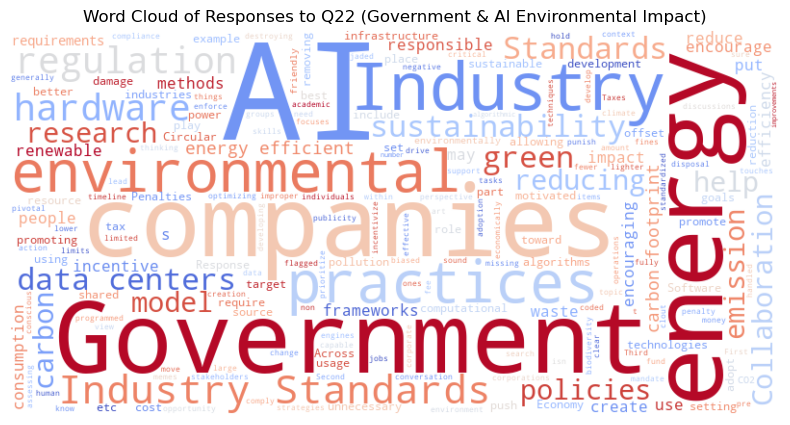

In [70]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
dropped_objects_df["Q22_Sentiment"] = dropped_objects_df["Q22_How_Can_Government_Help_Reduce_AI_Impact"].dropna().apply(
    lambda text: analyzer.polarity_scores(str(text))["compound"]
)

# Combine responses into a single string, emphasizing words from positive/negative responses
text_data = " ".join(dropped_objects_df["Q22_How_Can_Government_Help_Reduce_AI_Impact"].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Responses to Q22 (Government & AI Environmental Impact)")
plt.show()


# Other Visulations 

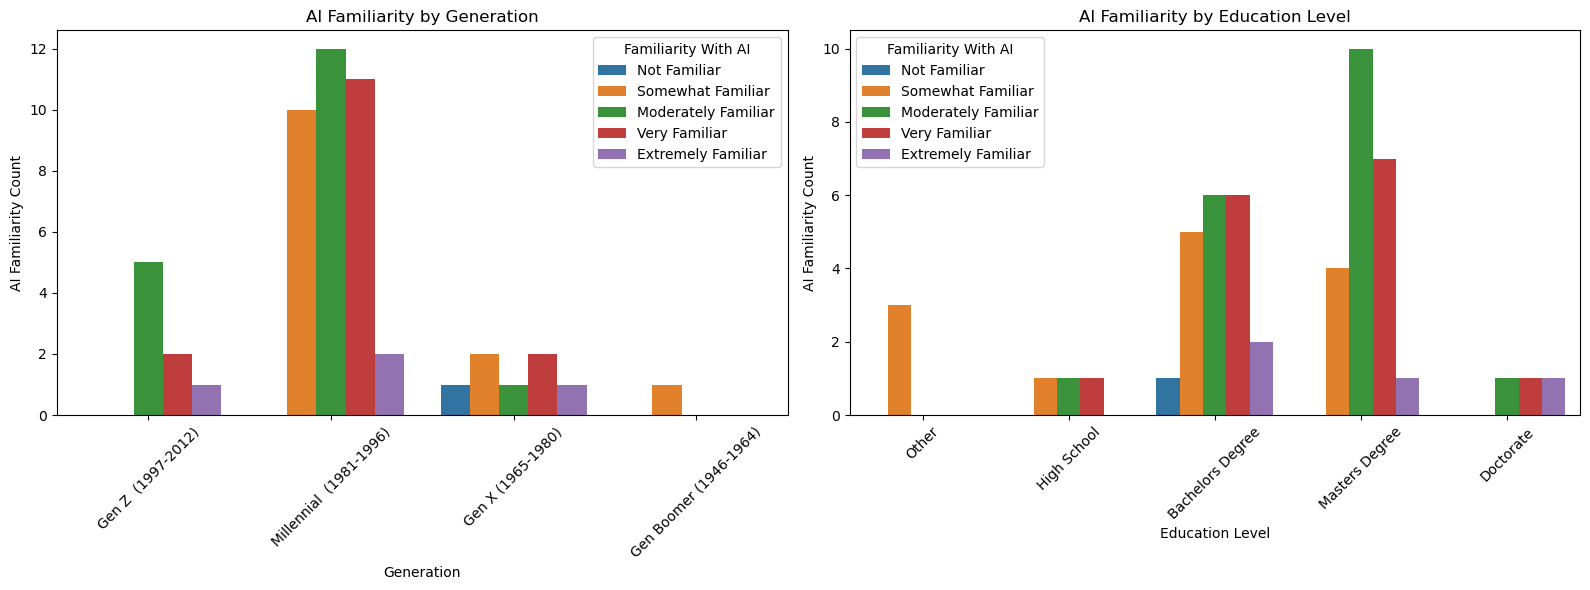

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy and filter data for Generation grouping
Generation_Group = dropped_objects_df.copy()
Generation_Group = Generation_Group[Generation_Group['Q3_Generation'].isin([
    'Millennial  (1981-1996)', 'Gen Z  (1997-2012)', 'Gen X (1965-1980)', 'Gen Boomer (1946-1964)', 'nan'
])]
Generation_Group = Generation_Group.groupby(['Q3_Generation', 'Q5_Familiarity_With_AI'])['Q11_AI_Use_Over_Traditional_Methods'].count().reset_index()
Generation_Group.columns = ['Q3_Generation', 'Q5_Familiarity_With_AI', 'Total']

gen_order = ['Gen Z  (1997-2012)', 'Millennial  (1981-1996)', 'Gen X (1965-1980)', 'Gen Boomer (1946-1964)']
ai_order = ["Not Familiar", "Somewhat Familiar", "Moderately Familiar", "Very Familiar", "Extremely Familiar"]

Generation_Group["Q3_Generation"] = pd.Categorical(Generation_Group["Q3_Generation"], categories=gen_order, ordered=True)
Generation_Group["Q5_Familiarity_With_AI"] = pd.Categorical(Generation_Group["Q5_Familiarity_With_AI"], categories=ai_order, ordered=True)
Generation_Group = Generation_Group.sort_values(["Q5_Familiarity_With_AI", "Q3_Generation"]).reset_index(drop=True)

# Copy and filter data for Education Level grouping
Group = dropped_objects_df[dropped_objects_df.Q2_Gender.isin(["Female", "Male"])].copy()
Group = Group[Group['Q1_Education_Level'].isin(['Bachelors Degree', 'Doctorate', 'Masters Degree', 'Other', 'High School'])]
Group = Group.groupby(['Q1_Education_Level', 'Q5_Familiarity_With_AI'])['Q11_AI_Use_Over_Traditional_Methods'].count().reset_index()
Group.columns = ['Q1_Education_Level', 'Q5_Familiarity_With_AI', 'Total']

edu_order = ["Other", "High School", "Bachelors Degree", "Masters Degree", "Doctorate"]
Group["Q1_Education_Level"] = pd.Categorical(Group["Q1_Education_Level"], categories=edu_order, ordered=True)
Group["Q5_Familiarity_With_AI"] = pd.Categorical(Group["Q5_Familiarity_With_AI"], categories=ai_order, ordered=True)
Group = Group.sort_values(["Q5_Familiarity_With_AI", "Q1_Education_Level"]).reset_index(drop=True)

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Generations
sns.barplot(data=Generation_Group, x='Q3_Generation', y='Total', hue='Q5_Familiarity_With_AI', ax=axes[0])
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("AI Familiarity Count")
axes[0].set_title("AI Familiarity by Generation")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Familiarity With AI")

# Plot for Education Levels
sns.barplot(data=Group, x='Q1_Education_Level', y='Total', hue='Q5_Familiarity_With_AI', ax=axes[1])
axes[1].set_xlabel("Education Level")
axes[1].set_ylabel("AI Familiarity Count")
axes[1].set_title("AI Familiarity by Education Level")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Familiarity With AI")

plt.tight_layout()
plt.show()


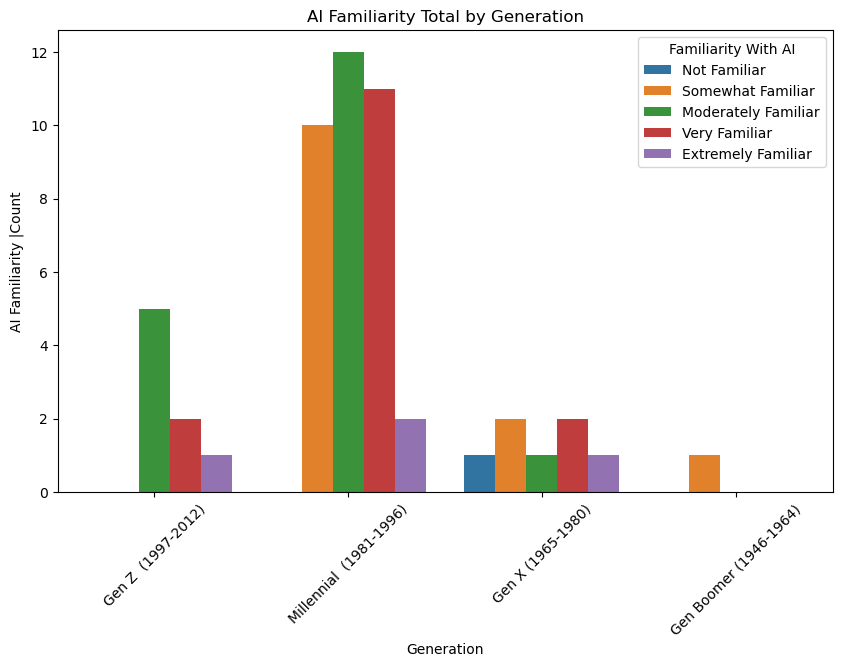

In [72]:
Generation_Group=dropped_objects_df.copy()
Generation_Group=Generation_Group[Generation_Group['Q3_Generation'].isin(['Millennial  (1981-1996)', 'Gen Z  (1997-2012)', 'Gen X (1965-1980)', 'Gen Boomer (1946-1964)', 'nan'])]
Generation_Group=Generation_Group.groupby(['Q3_Generation','Q5_Familiarity_With_AI'])['Q11_AI_Use_Over_Traditional_Methods'].count()
Generation_Group=Generation_Group.reset_index()


# Rename columns for clarity
Generation_Group.columns = ['Q3_Generation','Q5_Familiarity_With_AI', 'Total']
Generation_Group.reset_index()
# Define custom sorting order for 'Education_Level' and 'Familiarity_With_AI'
edu_order = [ 'Gen Z  (1997-2012)', 'Millennial  (1981-1996)','Gen X (1965-1980)', 'Gen Boomer (1946-1964)']
ai_order = ["Not Familiar", "Somewhat Familiar", "Moderately Familiar", "Very Familiar", "Extremely Familiar"]

# Convert both columns into categorical types with the specified order
Generation_Group["Q3_Generation"] = pd.Categorical(Generation_Group["Q3_Generation"], categories=edu_order, ordered=True)
Generation_Group["Q5_Familiarity_With_AI"] = pd.Categorical(Generation_Group["Q5_Familiarity_With_AI"], categories=ai_order, ordered=True)

# Sort the DataFrame based on 'Education_Level' first, then 'Familiarity_With_AI'
Generation_Group = Generation_Group.sort_values([ "Q5_Familiarity_With_AI",'Q3_Generation'])


# Display the sorted DataFrame
Generation_Group=Generation_Group.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=Generation_Group, x='Q3_Generation', y="Total", hue="Q5_Familiarity_With_AI")
plt.xlabel("Generation")
plt.ylabel("AI Familiarity |Count")
plt.title("AI Familiarity Total by Generation")
plt.xticks(rotation=45)
plt.legend(title="Familiarity With AI")
plt.show()

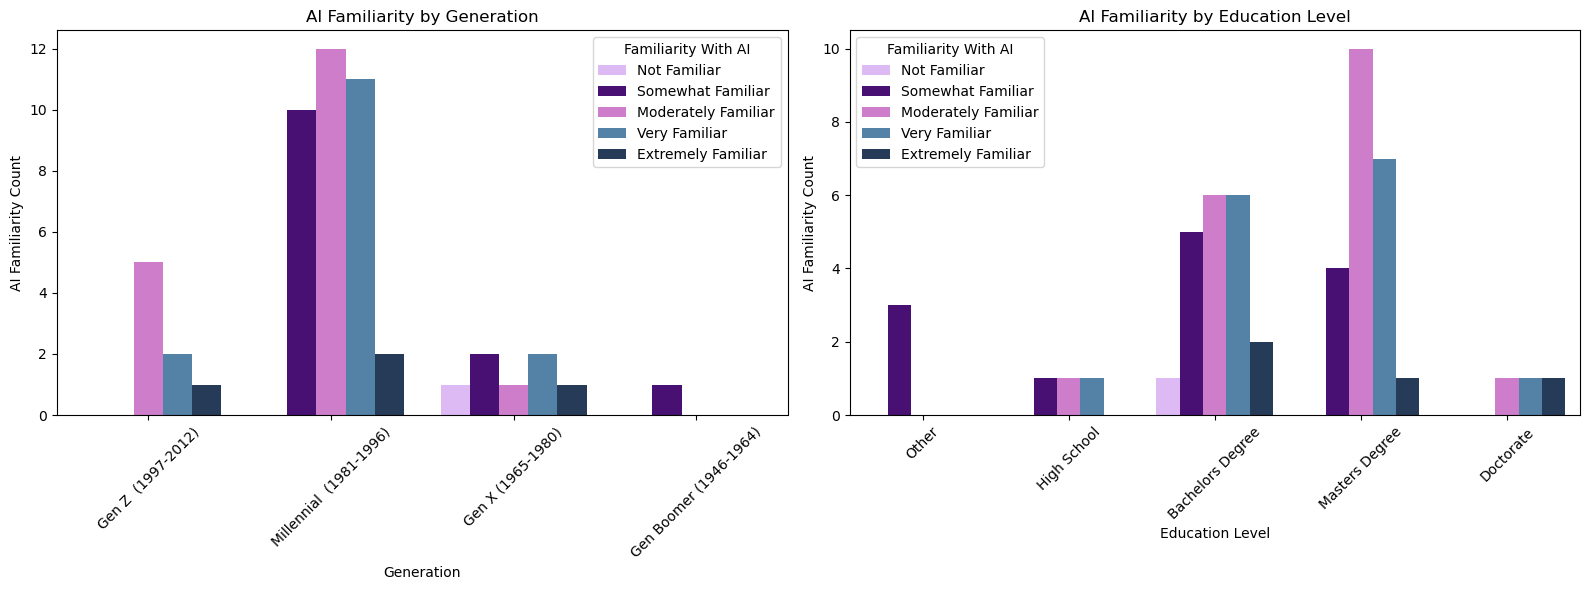

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define a custom blush + blue color palette
blush_blue_palette = ["#E0B0FF","#4B0082","#DA70D6","#4682B4", "#1E3A5F"]  # Soft pink to deep blue gradient

# Copy and filter data for Generation grouping
Generation_Group = dropped_objects_df.copy()
Generation_Group = Generation_Group[Generation_Group['Q3_Generation'].isin([
    'Millennial  (1981-1996)', 'Gen Z  (1997-2012)', 'Gen X (1965-1980)', 'Gen Boomer (1946-1964)', 'nan'
])]
Generation_Group = Generation_Group.groupby(['Q3_Generation', 'Q5_Familiarity_With_AI'])['Q11_AI_Use_Over_Traditional_Methods'].count().reset_index()
Generation_Group.columns = ['Q3_Generation', 'Q5_Familiarity_With_AI', 'Total']

gen_order = ['Gen Z  (1997-2012)', 'Millennial  (1981-1996)', 'Gen X (1965-1980)', 'Gen Boomer (1946-1964)']
ai_order = ["Not Familiar", "Somewhat Familiar", "Moderately Familiar", "Very Familiar", "Extremely Familiar"]

Generation_Group["Q3_Generation"] = pd.Categorical(Generation_Group["Q3_Generation"], categories=gen_order, ordered=True)
Generation_Group["Q5_Familiarity_With_AI"] = pd.Categorical(Generation_Group["Q5_Familiarity_With_AI"], categories=ai_order, ordered=True)
Generation_Group = Generation_Group.sort_values(["Q5_Familiarity_With_AI", "Q3_Generation"]).reset_index(drop=True)

# Copy and filter data for Education Level grouping
Group = dropped_objects_df[dropped_objects_df.Q2_Gender.isin(["Female", "Male"])].copy()
Group = Group[Group['Q1_Education_Level'].isin(['Bachelors Degree', 'Doctorate', 'Masters Degree', 'Other', 'High School'])]
Group = Group.groupby(['Q1_Education_Level', 'Q5_Familiarity_With_AI'])['Q11_AI_Use_Over_Traditional_Methods'].count().reset_index()
Group.columns = ['Q1_Education_Level', 'Q5_Familiarity_With_AI', 'Total']

edu_order = ["Other", "High School", "Bachelors Degree", "Masters Degree", "Doctorate"]
Group["Q1_Education_Level"] = pd.Categorical(Group["Q1_Education_Level"], categories=edu_order, ordered=True)
Group["Q5_Familiarity_With_AI"] = pd.Categorical(Group["Q5_Familiarity_With_AI"], categories=ai_order, ordered=True)
Group = Group.sort_values(["Q5_Familiarity_With_AI", "Q1_Education_Level"]).reset_index(drop=True)

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Generations
sns.barplot(data=Generation_Group, x='Q3_Generation', y='Total', hue='Q5_Familiarity_With_AI', ax=axes[0],palette=blush_blue_palette)
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("AI Familiarity Count")
axes[0].set_title("AI Familiarity by Generation")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Familiarity With AI")

# Plot for Education Levels
sns.barplot(data=Group, x='Q1_Education_Level', y='Total', hue='Q5_Familiarity_With_AI', ax=axes[1],palette=blush_blue_palette)
axes[1].set_xlabel("Education Level")
axes[1].set_ylabel("AI Familiarity Count")
axes[1].set_title("AI Familiarity by Education Level")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Familiarity With AI")

plt.tight_layout()
plt.show()


In [74]:
import pandas as pd
import plotly.express as px

# Define sorting order
gen_order = ['Gen Z  (1997-2012)', 'Millennial  (1981-1996)', 'Gen X (1965-1980)', 'Gen Boomer (1946-1964)']
edu_order = ["Other", "High School", "Bachelors Degree", "Masters Degree", "Doctorate"]

# Sample DataFrames (Replace with actual data)
Generation_Group = dropped_objects_df[dropped_objects_df['Q3_Generation'].isin(
    ['Millennial  (1981-1996)', 'Gen Z  (1997-2012)', 'Gen X (1965-1980)', 'Gen Boomer (1946-1964)']
)].groupby(['Q3_Generation', 'Q5_Familiarity_With_AI'])['Q11_AI_Use_Over_Traditional_Methods'].count().reset_index()

Group = dropped_objects_df[dropped_objects_df['Q1_Education_Level'].isin(
    ['Other', 'High School','Bachelors Degree', 'Masters Degree','Doctorate']
)].groupby(['Q1_Education_Level', 'Q5_Familiarity_With_AI'])['Q11_AI_Use_Over_Traditional_Methods'].count().reset_index()



# Sort the data
Generation_Group['Q3_Generation'] = pd.Categorical(Generation_Group['Q3_Generation'], categories=gen_order, ordered=True)
Group['Q1_Education_Level'] = pd.Categorical(Group['Q1_Education_Level'], categories=edu_order, ordered=True)

# Interactive bar chart for Generation
fig1 = px.bar(Generation_Group, x='Q3_Generation', y='Q11_AI_Use_Over_Traditional_Methods',
              color='Q5_Familiarity_With_AI', barmode='stack',
              title="AI Familiarity by Generation", labels={'Q3_Generation': 'Generation', 'Q11_AI_Use_Over_Traditional_Methods': 'Count'})

# Interactive bar chart for Education Level
fig2 = px.bar(Group, x='Q1_Education_Level', y='Q11_AI_Use_Over_Traditional_Methods',
              color='Q5_Familiarity_With_AI', barmode='stack',
              title="AI Familiarity by Education Level", labels={'Q1_Education_Level': 'Education Level', 'Q11_AI_Use_Over_Traditional_Methods': 'Count'})

# Show figures
fig1.show()
fig2.show()


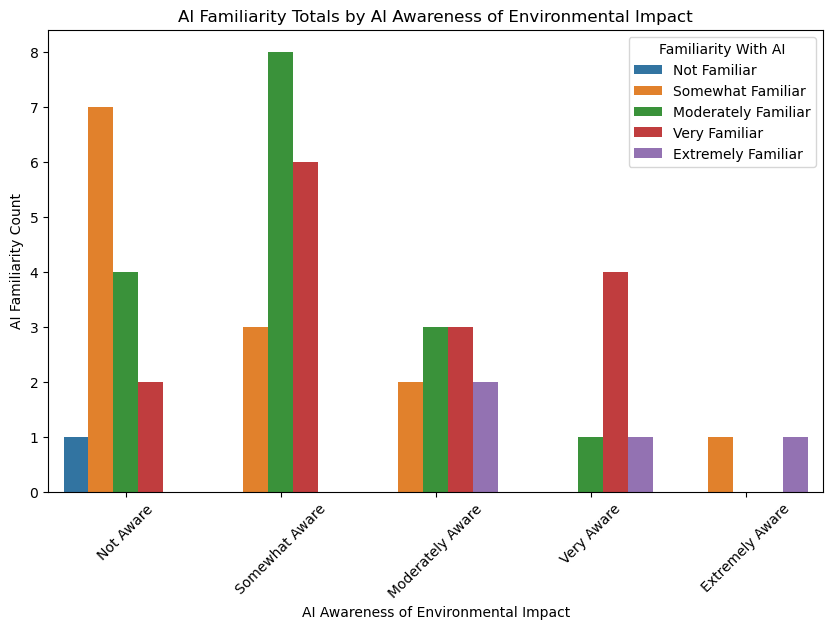

In [75]:
# Group data by Familiarity_With_AI and AI_Awareness_Of_Environmental_Impact, counting occurrences
Awareness_Of_Environmental_Impact = dropped_objects_df.groupby(
    ['Q5_Familiarity_With_AI', 'Q12_AI_Awareness_Of_Environmental_Impact']
)['Q11_AI_Use_Over_Traditional_Methods'].count().reset_index(name='Total')

# Merge with total counts per 'AI_Awareness_Of_Environmental_Impact'
total = Awareness_Of_Environmental_Impact.groupby(
    'Q12_AI_Awareness_Of_Environmental_Impact')['Total'].sum().reset_index(name='Familiarity_Total')
Awareness_Of_Environmental_Impact_df = Awareness_Of_Environmental_Impact.merge(total, on='Q12_AI_Awareness_Of_Environmental_Impact')




# Define custom sort order
edu_order = ['Not Aware', 'Somewhat Aware', 'Moderately Aware', 'Very Aware','Extremely Aware']
ai_order = ["Not Familiar", "Somewhat Familiar", "Moderately Familiar", "Very Familiar", "Extremely Familiar"]

# Apply categorical sorting
Awareness_Of_Environmental_Impact_df['Q12_AI_Awareness_Of_Environmental_Impact'] = pd.Categorical(Awareness_Of_Environmental_Impact_df['Q12_AI_Awareness_Of_Environmental_Impact'], categories=edu_order, ordered=True)
Awareness_Of_Environmental_Impact_df['Q5_Familiarity_With_AI'] = pd.Categorical(Awareness_Of_Environmental_Impact_df['Q5_Familiarity_With_AI'], categories=ai_order, ordered=True)

# Sort the DataFrame by Generation and Familiarity_With_AI
Awareness_Of_Environmental_Impact_df= Awareness_Of_Environmental_Impact_df.sort_values(['Q5_Familiarity_With_AI', 'Q12_AI_Awareness_Of_Environmental_Impact'])


# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Awareness_Of_Environmental_Impact_df, 
    x='Q12_AI_Awareness_Of_Environmental_Impact', 
    y='Total', 
    hue="Q5_Familiarity_With_AI"
)
plt.xlabel("AI Awareness of Environmental Impact")
plt.ylabel("AI Familiarity Count")
plt.title("AI Familiarity Totals by AI Awareness of Environmental Impact")
plt.xticks(rotation=45)
plt.legend(title="Familiarity With AI")
plt.show()

In [76]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Define independent and dependent variables
x = numrical_df[['Familiarity_With_AI']]
y = numrical_df['AI_Awareness_Of_Environmental_Impact']  # Ensure it's a single column (not a DataFrame)

# Fit the ordinal logistic regression model
model = OrderedModel(y, x, distr='logit')  # 'logit' or 'probit' can be used
results = model.fit(method='bfgs')  # Specify optimization method if needed

# Print the model summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 1.424318
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
                                      OrderedModel Results                                      
Dep. Variable:     AI_Awareness_Of_Environmental_Impact   Log-Likelihood:                -72.640
Model:                                     OrderedModel   AIC:                             157.3
Method:                              Maximum Likelihood   BIC:                             168.9
Date:                                  Tue, 11 Mar 2025                                         
Time:                                          16:23:23                                         
No. Observations:                                    51                                         
Df Residuals:                                        45                                         
Df Model:                                           

The Ordinal Logistic Regression (OLR) model examines the relationship between Familiarity_With_AI and AI_Awareness_Of_Environmental_Impact, treating the latter as an ordered categorical variable. The model's coefficient for Familiarity_With_AI is 0.9969 (p = 0.001), indicating that greater familiarity with AI significantly increases the likelihood of higher awareness of AI’s environmental impact. This relationship is stronger than what was observed in the OLS model.

The threshold coefficients (0/1, 1/2, 2/3, etc.) represent the cutoff points between different awareness levels. These values determine the probability of an individual being in one category versus another. Some cutoffs, such as 1/2 (0.9793, p < 0.001) and 2/3 (0.5224, p = 0.017), are significant, suggesting clear separations between these awareness levels. However, the 3/4 and 4/5 thresholds are not significant, implying weaker differentiation between these categories.

The model was estimated using Maximum Likelihood Estimation (MLE) and achieved a log-likelihood of -72.640, with AIC = 157.3 and BIC = 168.9, which help assess model fit.

Key Interpretation:
Higher familiarity with AI significantly increases AI awareness of environmental impact, with a strong and statistically significant effect. The threshold estimates indicate that awareness categories are not evenly spaced, with some levels being more distinct than others. 

# Statistics

In [77]:
import scipy.stats as stats

# Spearman's correlation test
spearman_corr, spearman_p = stats.spearmanr(numrical_df["Familiarity_With_Renewable_Energy_Initiatives"], numrical_df["AI_Awareness_Of_Environmental_Impact"])

print(f"Spearman’s Correlation: {spearman_corr}, p-value: {spearman_p}")

Spearman’s Correlation: 0.4637053619620684, p-value: 0.0006100905306532576


Spearman’s correlation measures the strength and direction of the monotonic relationship between two ranked variables. It is a nonparametric test, meaning it does not assume a normal distribution of the data, making it useful for ordinal, skewed, or non-linearly related data.

Interpretation of Results:
Spearman’s Correlation Coefficient (ρ) = 0.463

This value indicates a moderate positive correlation between Familiarity With Renewable Energy Initiatives and AI Awareness Of Environmental Impact.
A correlation of 0.456 suggests that as familiarity with renewable energy initiatives increases, awareness of AI’s environmental impact also tends to increase.
p-value = 0.00061

The p-value is significantly below the common significance threshold of 0.05, suggesting that the correlation is statistically significant.
This means that the observed relationship is unlikely to have occurred by chance, providing strong evidence of an association between the two variables.
Conclusion:
The results suggest that individuals who are more familiar with renewable energy initiatives also tend to have greater awareness of AI’s environmental impact. This finding could imply a broader environmental consciousness among participants or a shared source of knowledge influencing both areas.

In [78]:
import numpy as np
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(dropped_objects_df["Gender"], dropped_objects_df["AI_Awareness_Of_Environmental_Impact"])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate Cramér's V
n = np.sum(contingency_table.values)  # Total sample size
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))

print(f"Chi-square: {chi2}, p-value: {p}, Cramér's V: {cramers_v}")


Chi-square: 1.5785714285714285, p-value: 0.9038284712986203, Cramér's V: 0.17593288763724918


1. Chi-square Test (χ² = 1.58, p = 0.90)
What this means: The Chi-square test checks whether AI awareness differs significantly across gender categories.
p-value = 0.88 (which is much higher than 0.05) → This means that any differences in AI awareness across genders are likely due to random chance.
Conclusion: Gender does not have a significant effect on AI awareness.
2. Cramér’s V (0.180)
What this means: Cramér’s V measures the strength of association between gender and AI awareness.
Value = 0.180 → This is a very weak association (values closer to 0 mean a weaker relationship).
Interpretation: While there may be some variation in AI awareness by gender, it is not strong enough to be meaningful.
Final Conclusion
The high p-value (0.88) means there’s no statistically significant difference in AI awareness across gender groups.
The low Cramér’s V (0.185) confirms that gender and AI awareness are weakly associated at best.
Practical Implication: Gender is not a major factor in determining AI environmental awareness.

In [79]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = numrical_df[['AI_Companies_Energy_Consumption_Regulations']]  # Example: predictor variable
y = numrical_df['Limiting_Use_Of_AI_For_Environmental']  # Replace with actual target variable

# Add a constant term (if using OLS)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get residuals
numrical_df["residuals"] = model.resid

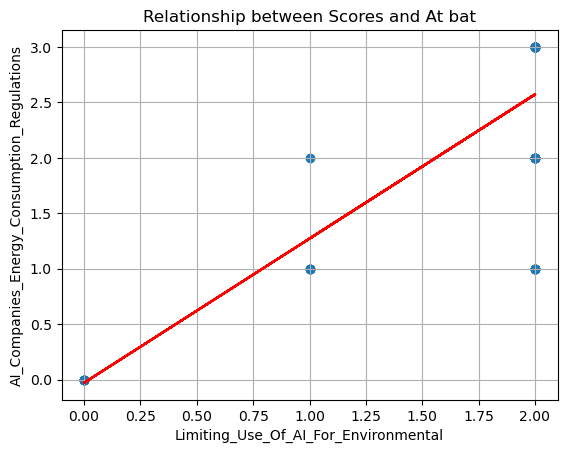

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# scatter plot for Scores and At bats 
plt.scatter(numrical_df['AI_Companies_Energy_Consumption_Regulations'], numrical_df['Limiting_Use_Of_AI_For_Environmental'] )


# Fitting a regression line
slope, intercept, r_value, p_value, std_err = linregress(numrical_df['AI_Companies_Energy_Consumption_Regulations'], numrical_df['Limiting_Use_Of_AI_For_Environmental'])
#Calculate the Y values for the regression line
regression_line = slope * numrical_df['AI_Companies_Energy_Consumption_Regulations'] + intercept
#plot the regression line
plt.plot(numrical_df['AI_Companies_Energy_Consumption_Regulations'], regression_line, color='red', label='Regression Line')



plt.title('Relationship between Scores and At bat')
plt.xlabel('Limiting_Use_Of_AI_For_Environmental')
plt.ylabel('AI_Companies_Energy_Consumption_Regulations')


plt.grid(True)
plt.show()

In [81]:
# Get the residuals 

predicted_probs = results.predict() # Get predicted probabilities

# Get predicted categories (most likely outcome)
predicted_categories = predicted_probs.argmax(axis=1)

# Compute residuals (difference between actual and predicted categories)
resid =numrical_df['Limiting_Use_Of_AI_For_Environmental'] - predicted_categories
numrical_df["residuals"] = resid



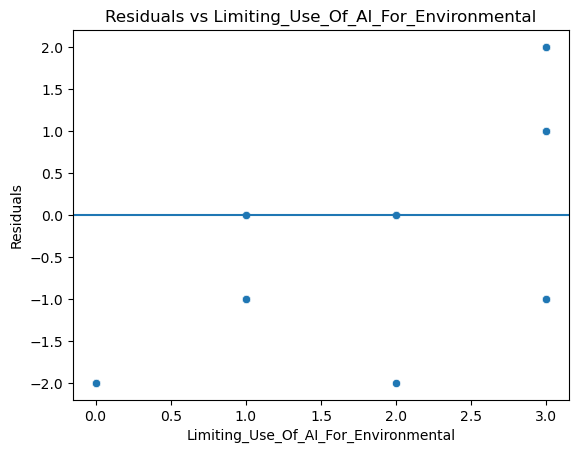

In [82]:
sns.scatterplot(data=numrical_df, x=numrical_df['Limiting_Use_Of_AI_For_Environmental'], y="residuals")
plt.axhline(y=0)
#https://www.reneshbedre.com/blog/learn-to-calculate-residuals-regression.html

plt.xlabel('Limiting_Use_Of_AI_For_Environmental')
plt.ylabel('Residuals')
plt.title('Residuals vs Limiting_Use_Of_AI_For_Environmental')
plt.show()